# Python Final Assignment

The given Dataset contains 4 different worksheets. Below i have provided data dictionaries, to better understand the datasets. <br><br>
The Company worksheet contains firmographics. The Investment worksheet conatains information about relevant investments received by the companies. The Acqusistion worksheet contains inforamtion about relevant acquisitions the companies have made. The last worksheet, Employee, contains relevant employees working in the different companies.
<br><br>
The dataset gives some interesting insights about the different companies, like Google, IBM or Microsoft. Through out the following Notebook different questions will be answered. <br>
In the end i will also provide you a dashboard which contains the most important information for the company you are looking for.

* How many companies have received at least one round of investment?
* How many companies have received at least one round of investment?
* Which are the top 10 companies, which have raised the most money during multiple funding stages?
* Which country has the highest average total funding among its companies, and how is this funding distributed across different nations?
* Which country has the highest total funding among its companies, and how is this funding distributed across different nations?
* What is the historical trend of company formations over the past century? (on a yearly basis)
* How does the average fundraising amount vary across different company size categories?
* What is the historical trend of the total investment amount across all companies? (on a yearly basis)
* How does the average fundraising amount vary across the different funding Rounds worldwide?
* How does the total fundraising amount vary across the different funding Rounds worldwide?
* How does the total fundraising amount vary across the different funding Rounds grouped by the industry?
* How does the age of a company relate to its acquisition activity?
* How have the annual number of acquisitions and total expenditure on acquisitions by companies evolved over time?
* Which countries have the highest average acquisition costs as paid by companies?
* Which countries have the highest total acquisition costs as paid by companies?
* Which industries have the highest average acquisition costs as paid by companies?
* Which industries have the total acquisition costs as paid by companies?
* Which company has spent the most for acquisitions?
* Which company has done the most acqusitions?
* Where did the CEO's of these companies have studied?
* Company Dashboard

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>Company Data Sheets</title>
<style>
  .row {
    display: flex;
    justify-content: space-between;
    margin-bottom: 20px;
  }
  .column {
    flex: 1;
    margin-right: 20px;
  }
  .column:last-child {
    margin-right: 0;
  }
  table, th, td {
    border: 1px solid black;
    border-collapse: collapse;
  }
  th, td {
    padding: 5px;
    text-align: left;
  }
</style>
</head>
<body>

<div class="row">
  <div class="column">
    <h2>Company Worksheet</h2>
    <table>
      <tr><th>Variable</th><th>Comment</th></tr>
      <tr><td>COMPANY_NAME</td><td>Company name (unique ID)</td></tr>
      <tr><td>CATEGORY</td><td>Industry category</td></tr>
      <tr><td>LOCATION</td><td>Company location</td></tr>
      <tr><td>FOUNDED_ON</td><td>Date that the company was founded</td></tr>
      <tr><td>EXITED_ON</td><td>Date that the company exited (if any)</td></tr>
      <tr><td>CLOSED_ON</td><td>Date that the company was closed (if any)</td></tr>
      <tr><td>REVENUE_RANGE</td><td>Revenue range</td></tr>
      <tr><td>EMPLOYEE_NUMBER</td><td>The number of employees</td></tr>
    </table>
  </div>
  <div class="column">
    <h2>Investment Worksheet</h2>
    <table>
      <tr><th>Variable</th><th>Comment</th></tr>
      <tr><td>COMPANY_NAME</td><td>Company name</td></tr>
      <tr><td>FUNDING_TYPE</td><td>The type of funding</td></tr>
      <tr><td>MONEY_RAISED</td><td>The amount of money raised in the investment</td></tr>
      <tr><td>ANNOUNCED_DATE</td><td>Date that the investment was announced</td></tr>
      <tr><td>INVESTMENT_STAGE</td><td>The investment stage</td></tr>
    </table>
  </div>
</div>

<div class="row">
  <div class="column">
    <h2>Acquisition Worksheet</h2>
    <table>
      <tr><th>Variable</th><th>Comment</th></tr>
      <tr><td>COMPANY_NAME</td><td>Company name</td></tr>
      <tr><td>ACQUIREE_NAME</td><td>Name of the acquired company</td></tr>
      <tr><td>ANNOUNCED_DATE</td><td>Date that the acquisition was announced</td></tr>
      <tr><td>PRICE</td><td>The price of acquisition</td></tr>
      <tr><td>ACQUISITION_TYPE</td><td>The type of acquisition</td></tr>
    </table>
  </div>
  <div class="column">
    <h2>Employee Worksheet</h2>
    <table>
      <tr><th>Variable</th><th>Comment</th></tr>
      <tr><td>EMPLOYEE_MD5</td><td>Hashed unique ID for employee</td></tr>
      <tr><td>JOB_TITLES</td><td>Job titles</td></tr>
      <tr><td>COMPANY_NAME</td><td>Company name</td></tr>
      <tr><td>ATTENDED_SCHOOLS</td><td>Schools that the employee has attended</td></tr>
    </table>
  </div>
</div>

</body>
</html>


# Loading, Exploring and Cleaning the data 

In [306]:
# Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from datetime import datetime
import re

### Loading the dataset with the different worksheets

In [307]:
df_company = pd.read_excel('Copy of 2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'COMPANY')
df_investment = pd.read_excel('Copy of 2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'INVESTMENT')
df_acquisition = pd.read_excel('Copy of 2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'ACQUISITION')
df_employee = pd.read_excel('Copy of 2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'EMPLOYEE')

In [308]:
df_company.isna().sum()

COMPANY_NAME       0
CATEGORY           0
LOCATION           0
FOUNDED_ON         0
EXITED_ON          0
CLOSED_ON          0
REVENU_RANGE       0
EMPLOYEE_NUMBER    0
dtype: int64

## Data Exploration

In [309]:
# Check for missing and duplicate values
# For the company worksheet
print("Company worksheet:")
print(f'Missing values:\n{df_company.isna().sum()}\n')
print(f'Duplicate rows: {df_company.duplicated().sum()}\n')

# For the investment worksheet
print("Investment worksheet:")
print(f'Missing values:\n{df_investment.isna().sum()}\n')
print(f'Duplicate rows: {df_investment.duplicated().sum()}\n')

# For the acquisition worksheet
print("Acquisition worksheet:")
print(f'Missing values:\n{df_acquisition.isna().sum()}\n')
print(f'Duplicate rows: {df_acquisition.duplicated().sum()}\n')

# For the employee worksheet
print("Employee worksheet:")
print(f'Missing values:\n{df_employee.isna().sum()}\n')
print(f'Duplicate rows: {df_employee.duplicated().sum()}')


Company worksheet:
Missing values:
COMPANY_NAME       0
CATEGORY           0
LOCATION           0
FOUNDED_ON         0
EXITED_ON          0
CLOSED_ON          0
REVENU_RANGE       0
EMPLOYEE_NUMBER    0
dtype: int64

Duplicate rows: 0

Investment worksheet:
Missing values:
COMPANY_NAME        0
FUNDING_TYPE        0
MONEY_RAISED        0
ANNOUNCED_DATE      0
INVESTMENT_STAGE    0
dtype: int64

Duplicate rows: 1167

Acquisition worksheet:
Missing values:
COMPANY_NAME        0
ACQUIREE_NAME       0
ANNOUNCED_DATE      0
PRICE               0
ACQUISITION_TYPE    0
dtype: int64

Duplicate rows: 1093

Employee worksheet:
Missing values:
EMPLOYEE_MD5            0
JOB_TITLES              0
COMPANY_NAME            0
ATTENDED_SCHOOLS    14118
dtype: int64

Duplicate rows: 0


Based on this analysis i will drop the duplicates in the  df_investment and df_acquisition dataframe. The Missing values in the Employee worksheet in the column Attended School doesnt affect our analysis.

In [310]:
df_investment.drop_duplicates(inplace=True)

df_acquisition.drop_duplicates(inplace=True)

## How many companies have received at least one round of investment?

In [311]:
df_investment['FUNDING_TYPE'].unique()

array(['Venture - Series Unknown', 'Series A', 'Seed', 'Corporate Round',
       'Secondary Market', 'Series D', 'Series C', 'Debt Financing',
       'Series B', 'Post-IPO Equity', 'Grant', 'Series G', 'Series F',
       'Pre-Seed', 'Private Equity', 'Series E', 'Non-equity Assistance',
       'Post-IPO Debt', 'Series H', 'Angel', 'Convertible Note',
       'Funding Round', 'Series J', 'Series I', 'Equity Crowdfunding',
       'Initial Coin Offering', 'Post-IPO Secondary',
       'Product Crowdfunding'], dtype=object)

In [312]:
len(df_investment['FUNDING_TYPE'].unique())

28

Here you see that there are 28 different types of investment rounds a company could have had

In [313]:
df_company['COMPANY_NAME'].duplicated().sum()

0

## Currency Conversion in Investment DataFrame

In the following the financial data in the `df_investment` and the `df_acquisition` DataFrame is gonna to be standardized. Since the dataset contains monetary values in various currencies, the goal is to convert all monetary figures into a uniform currency (USD) for consistency and ease of analysis.

The process involves several steps:

1. **Identify Currency**: First the currency for each monetary value using the `identify_currency` function is identified, which maps symbols found in the `MONEY_RAISED` and `PRICE` column to their respective currency codes. The column `MONEY_RAISED` and `PRICE` contain 17 different currencies, which i converted into US Dollar.

2. **Currency Conversion**: The `convert_to_usd` function is then used to convert each amount to USD. It utilizes the `get_exchange_rate` function, which fetches real-time exchange rates from the `exchangeratesapi.io` API.

3. **Data Cleaning and Conversion**: The `MONEY_RAISED` and `PRICE` column is cleaned to remove non-numeric characters and then these strings are converted to numeric values.

4. **Applying Conversion to DataFrame**: Finally, these functions are applied to the `df_investment` and `df_acquisition` DataFrame, and a new column `MONEY_RAISED_USD` that contains the standardized USD values is created in the `df_investment` dataframe. In the `df_acquisition` the column `PRICE` is converted.

In [314]:
import requests

def get_exchange_rate(currency):
    try:
        response = requests.get(f"https://api.exchangeratesapi.io/latest?base={currency}&symbols=USD")
        data = response.json()
        return data['rates']['USD']
    except:
        return 1

def convert_to_usd(amount, currency):
    return amount * get_exchange_rate(currency)

def identify_currency(value):
    currency_symbols = {
        '€': 'EUR',
        '¥': 'JPY',
        '₹': 'INR',
        '£': 'GBP',
        'CA': 'CAD', 
        'A': 'AUD',
        'CN': 'CNY',
        'R': 'BRL',
        'Z': 'ZAR',
        'SG': 'SGD',
        'D': 'AED',
        '₩': 'KRW',
        'CHF': 'CHF',
        'MY': 'MYR',
        'SEK': 'SEK',
        'UB': 'RUB',
        '$': 'USD'
    }
    
    for symbol, currency in currency_symbols.items():
        if symbol in value:
            return currency
    return None

# replace empty strings
df_investment['MONEY_RAISED'] = df_investment['MONEY_RAISED'].replace('', np.nan)

df_investment['CURRENCY'] = df_investment['MONEY_RAISED'].apply(identify_currency)

# converting string to numeric values
df_investment['MONEY_RAISED'] = df_investment['MONEY_RAISED'].str.replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

# creating the MONEY_RAISED_USD columnn which is the converted one
df_investment['MONEY_RAISED_USD'] = df_investment.apply(lambda x: convert_to_usd(x['MONEY_RAISED'], x['CURRENCY']), axis=1)

# replace empty strings
df_acquisition['PRICE'] = df_acquisition['PRICE'].replace('', np.nan)

df_acquisition['CURRENCY'] = df_acquisition['PRICE'].apply(identify_currency)

# converting string to numeric values
df_acquisition['PRICE'] = df_acquisition['PRICE'].str.replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

# creating the MONEY_RAISED_USD columnn which is the converted one
df_acquisition['PRICE'] = df_acquisition.apply(lambda x: convert_to_usd(x['PRICE'], x['CURRENCY']), axis=1)

In the following i created a dataframe (df_investment_per_company), which shows the total amount of money each Company has raised so far in US Dollar.

In [315]:
# creating a dataframe which shows the total amount of money raised for each company
df_investment_per_company = df_investment.groupby('COMPANY_NAME')['MONEY_RAISED_USD'].agg('sum').reset_index()
df_investment_per_company.columns = ['COMPANY_NAME', 'MONEY_RAISED_TOTAL_USD']
df_investment_per_company['MONEY_RAISED_TOTAL_USD'] = df_investment_per_company['MONEY_RAISED_TOTAL_USD'].apply(lambda x: f"${x:,.2f}")

In [316]:
df_investment_per_company = df_investment_per_company[df_investment_per_company["MONEY_RAISED_TOTAL_USD"] > "$0,00"]
len(df_investment_per_company)

935

The given Dataset contains 28 different Funding Types for 935 different Companies. Out of these different Companies not every Company was able to raise money.

As you can see above 935 Companies have received at least one round of investment. However In the following you can see a distribution of how much money these companies have raised over time across multiple investment rounds. 

In [317]:
# Merging df_company and df_investment_per_company
df_investment_per_company = df_investment_per_company.merge(df_company[['COMPANY_NAME', 'LOCATION']], on='COMPANY_NAME', how='left')

In [318]:
df_investment_per_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   COMPANY_NAME            935 non-null    object
 1   MONEY_RAISED_TOTAL_USD  935 non-null    object
 2   LOCATION                935 non-null    object
dtypes: object(3)
memory usage: 22.0+ KB


# Geographic Distribution of Investments - Is there any interesting oberservation?

To get a deeper understanding of the investment landscape, the total money raised by companies across different locations is visualized on an interactive map. This visualization helps to identify investment hotspots and provides insights into the geographical distribution of fundings. To create the map the 'folium' library was used. I aggregated all the money raised by the companies for each city. To understand how different the amounts are, i visualized the amount using the blue circle markers, where the size of each marker corresponds to the total amount of money raised in that location. 

The scale for these markers is ['MONEY_RAISED_TOTAL_USD'] / 100000000

**The map displays several insights about the dataset:**

- **Investment Hotspots**: The map clearly shows which cities are hubs for investment.

- **Global Spread**: The map shows the distribution of investments across the globe. 

- **Cluster Patterns**: The use of 'MarkerCluster' show how investments are not only concentrated in single cities but also clustered within regions. This can reflect regional economic policies, the presence of investment firms, or a concentration of talent and resources.

- **Data Sparsity**: Areas with smaller or no markers can indicate regions with less investment activity. This could highlight places with potential for growth or areas that are currently underserved by venture capital.

Therefore the map allows stakeholders, analysts, and entrepreneurs to identify trends, opportunities, and gaps within the global investment landscape.

Feel free to explore the investment landscape!


In [319]:
import folium
from folium import CustomIcon
from folium.plugins import MarkerCluster 
from geopy.geocoders import Nominatim

# Check if the column contains string values
if df_investment_per_company['MONEY_RAISED_TOTAL_USD'].dtype == 'O': 
    df_investment_per_company['MONEY_RAISED_TOTAL_USD'] = df_investment_per_company['MONEY_RAISED_TOTAL_USD'].str.replace('$','').str.replace(',','').astype(float)


# Aggregating Data
agg_data = df_investment_per_company.groupby('LOCATION').agg(
    {'COMPANY_NAME':'size', 'MONEY_RAISED_TOTAL_USD':'sum'}).reset_index()

# Creating map
m = folium.Map(location=[20,0], zoom_start=4) 

geolocator = Nominatim(user_agent='geoapi')

# Creating MarkerCluster 
marker_cluster = MarkerCluster().add_to(m)

for i in range(0, len(agg_data)):
    try:
        location = geolocator.geocode(agg_data.iloc[i]['LOCATION'])
        
        # Creating popup content
        companies_in_city = df_investment_per_company[df_investment_per_company['LOCATION'] == agg_data.iloc[i]['LOCATION']]
        popup_content = agg_data.iloc[i]['LOCATION'] + ':<br>'
        for index, row in companies_in_city.iterrows():
            popup_content += row['COMPANY_NAME'] + ': $' + str(row['MONEY_RAISED_TOTAL_USD']) + '<br>'
        popup_content += 'Total Money raised in this City: $' + str(agg_data.iloc[i]['MONEY_RAISED_TOTAL_USD'])
        
        popup = folium.Popup(popup_content, max_width=300)
        
        # Adding CircleMarker
        folium.CircleMarker(
            location=[location.latitude, location.longitude],
            radius=5 + (agg_data.iloc[i]['MONEY_RAISED_TOTAL_USD'] / 100000000),
            popup=popup,
            color="blue",
            fill=True
        ).add_to(marker_cluster)
    except:
        pass

# Adding legend
legend_html = '''
<div style="position: fixed; bottom: 10px; left: 10px; width: 200px; height: 90px; 
            border:2px solid grey; z-index:9999; font-size:14px; background-color:white; opacity: 0.8;">
    &nbsp;<b>Raised Money:</b><br>
    &nbsp;<i class="fa fa-circle fa-1x" style="color:blue"></i>&nbsp;Low<br>
    &nbsp;<i class="fa fa-circle fa-2x" style="color:blue"></i>&nbsp;Medium<br>
    &nbsp;<i class="fa fa-circle fa-3x" style="color:blue"></i>&nbsp;High<br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m

# Which are the top 10 companies, which have raised the most money during multiple funding stages?

In [320]:
df_investment_per_company['MONEY_RAISED_TOTAL_USD'] = df_investment_per_company['MONEY_RAISED_TOTAL_USD'].replace('$','').replace(',','').astype(float)
df_investment_per_company.head(10).sort_values(by = 'MONEY_RAISED_TOTAL_USD', ascending = False)

,COMPANY_NAME,MONEY_RAISED_TOTAL_USD,LOCATION
0,1mg,789100000.0,"Gurgaon, Haryana, India"
1,23andMe,705653320.0,"Mountain View, California, United States"
5,ATAI Life Sciences,343500000.0,"Munich, Bayern, Germany"
7,AbCellera Biologics,296217878.0,"Vancouver, British Columbia, Canada"
3,4D Molecular Therapeutics,171999995.0,"Emeryville, California, United States"
8,Abnormal Security,74000000.0,"San Francisco, California, United States"
4,908 Devices,56100000.0,"Boston, Massachusetts, United States"
6,Aave,49000000.0,"London, England, United Kingdom"
2,360VUZ,8443000.0,"Los Angeles, California, United States"
9,Accenture,6000000.0,"Dublin, Dublin, Ireland"


**Above you can see the top 10 companies** <br>
The Company 1mg, which is located in Gurgaon, Haryana, India has raised the most money during multiple funding stages.

# Which country has the highest average and total funding among its companies, and how is this funding distributed across different nations?

The visualizations below reflect the funding amount that companies receive across different nations. Therefore the following informations are provided: 

- **Average Money Raised**: Indicates the mean funding amount companies in each country receive.
- **Total Money Raised**: Shows the aggregate funding across all companies within a country.

These insights can help to understand not just the volume of investment but also the average support a business might expect in various regions. The data is presented in a user-friendly manner, with amounts scaled to millions or billions of USD for ease of interpretation.

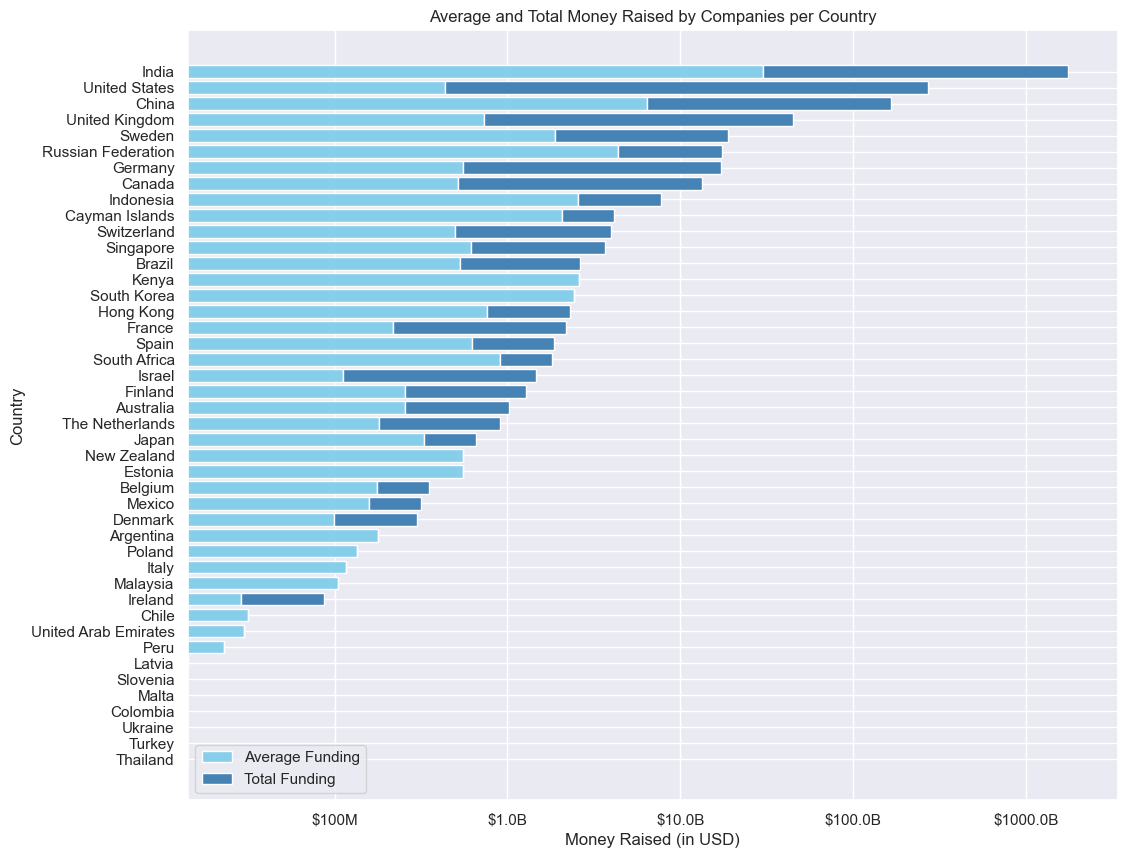

In [321]:
df_investment_per_company['COUNTRY'] = df_investment_per_company['LOCATION'].str.split(',').str[-1].str.strip()

# Calculate the average money raised per country
average_investment_by_country = df_investment_per_company.groupby('COUNTRY')['MONEY_RAISED_TOTAL_USD'].mean().sort_values(ascending=False)

# Calculating the total money raised per country
total_investment_by_country = df_investment_per_company.groupby('COUNTRY')['MONEY_RAISED_TOTAL_USD'].sum().sort_values(ascending=False)

# Convert Series to DataFrame and rename the columns
df_avg = average_investment_by_country.reset_index(name='Average Funding')
df_total = total_investment_by_country.reset_index(name='Total Funding')

# Merge the DataFrames on the 'Country' column
df_combined = pd.merge(df_avg, df_total, on='COUNTRY')

# Sort the DataFrame by 'Total Funding' for visualization purposes
df_combined.sort_values('Total Funding', ascending=True, inplace=True)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# stacked bar with average and total funding
ax.barh(df_combined['COUNTRY'], df_combined['Average Funding'], color='skyblue', label='Average Funding')
ax.barh(df_combined['COUNTRY'], df_combined['Total Funding'] - df_combined['Average Funding'], left=df_combined['Average Funding'], color='steelblue', label='Total Funding')

# Formatting the x-axis with the flexible formatter
def flexible_formatter(x, pos):
    if x >= 1e9:
        return f'${x * 1e-9:.1f}B'
    return f'${x * 1e-6:.0f}M'

# Set the labels and title
plt.xlabel('Money Raised (in USD)')
plt.ylabel('Country')
plt.title('Average and Total Money Raised by Companies per Country')
plt.legend()
plt.xscale('log')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))


# Display the plot
plt.show()


## Analysis of Funding by Country

The chart presents a dual perspective on the financial landscape of company funding across various countries. The darker bars represent the average funding received by companies within a country, giving insight into the typical investment companies might expect. The lighter bars show the total funding within each country, providing a view of the overall investment landscape.

From the chart, you can observe that while some countries may lead in total funding due to a few large investments, others show a consistently high average funding, which might indicate a robust and supportive investment environment for startups and growing businesses.

The logarithmic scale on the x-axis allows for an easier comparison across a wide range of values, highlighting countries that, despite smaller economies, are competitive in attracting substantial funding for their enterprises.

### In the following the average and total Funding by companies across the different Countries is displayed in individual barcharts.

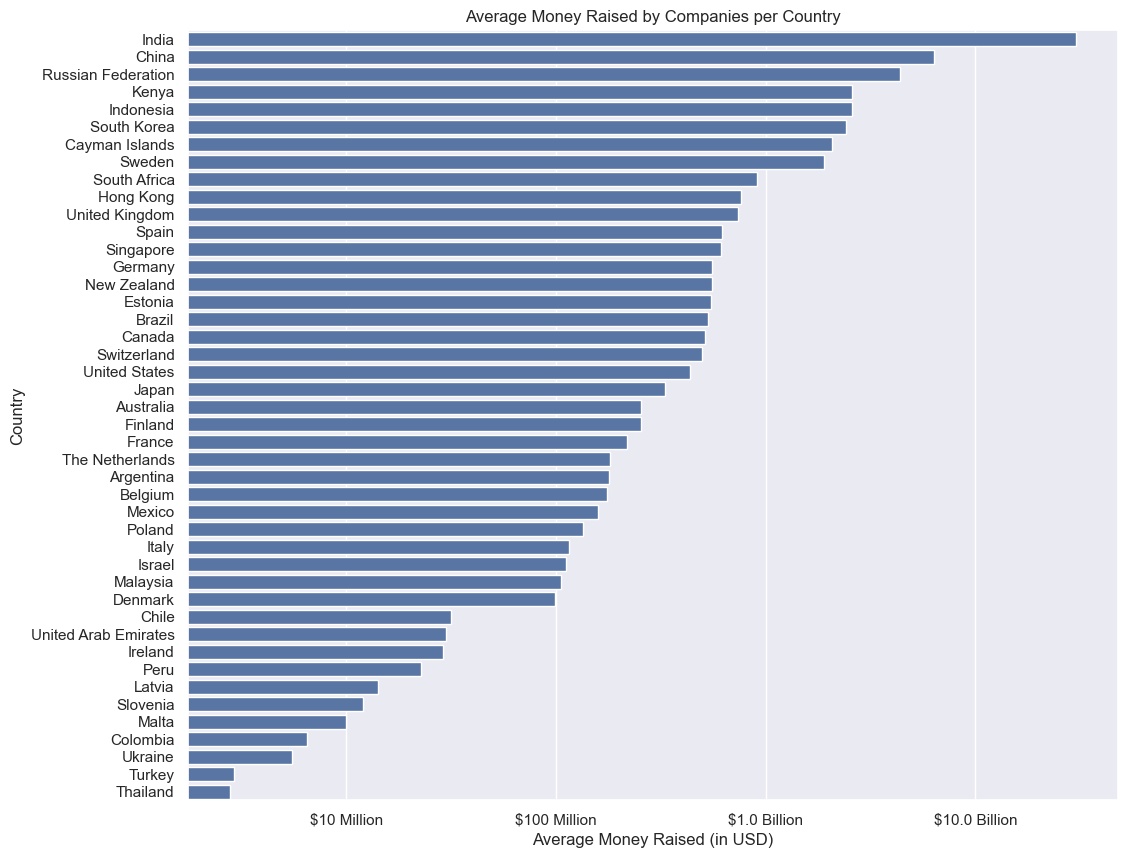

In [322]:
def flexible_formatter(x, pos):
    if x >= 1e9:  
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

# Visualization using a bar chart with a logarithmic scale
plt.figure(figsize=(12, 10))
sns.barplot(x=average_investment_by_country.values, y=average_investment_by_country.index)
plt.title('Average Money Raised by Companies per Country')
plt.xlabel('Average Money Raised (in USD)')
plt.ylabel('Country')
plt.xscale('log')
sns.set_palette("pastel")
sns.set()

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()


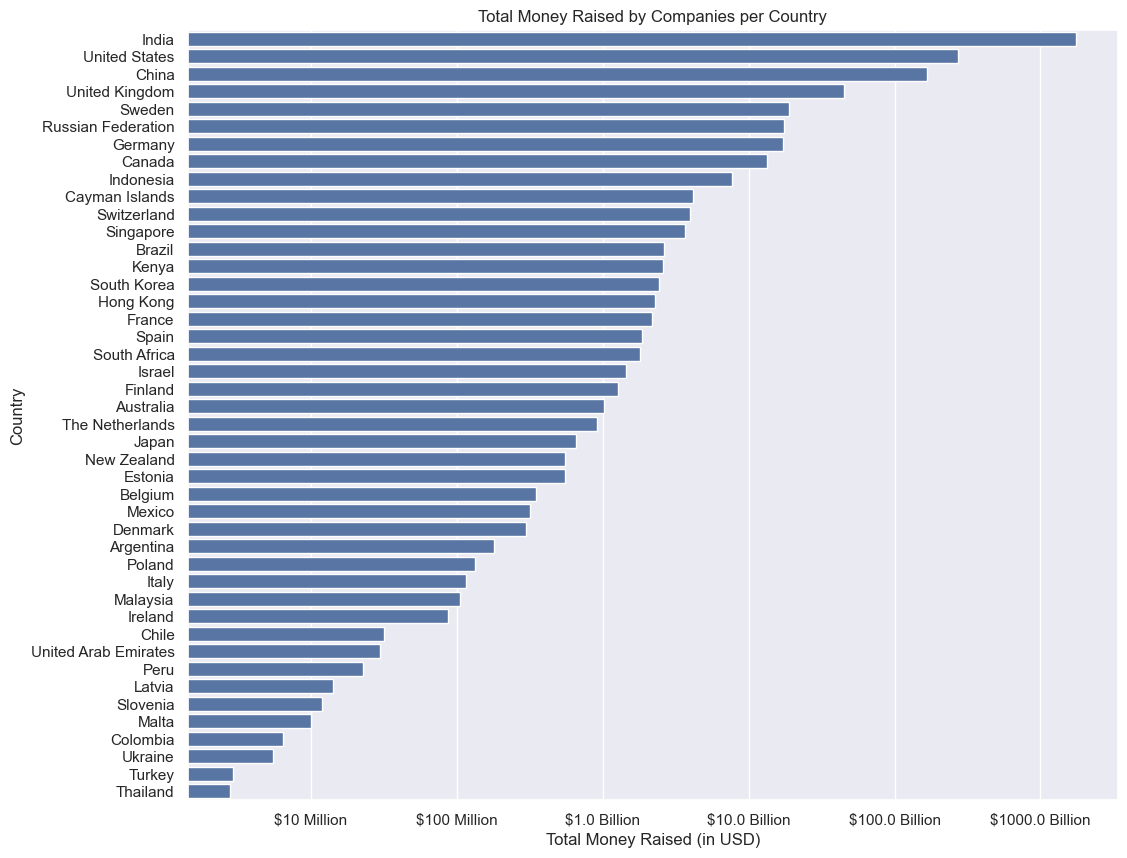

In [323]:
def flexible_formatter(x, pos):
    if x >= 1e9:
        val = '$%1.1f Billion' % (x * 1e-9)
    else:  
        val = '$%1.0f Million' % (x * 1e-6)
    return val

# Visualization using a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=total_investment_by_country.values, y=total_investment_by_country.index)
plt.title('Total Money Raised by Companies per Country')
plt.xlabel('Total Money Raised (in USD)')
plt.ylabel('Country')
plt.xscale('log')
sns.set_palette('pastel')
sns.set()

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

# What is the historical trend of company formations over the past century? (on a yearly basis)

### Cleaning 'FOUNDED_ON' Column of df_company

In [324]:
# Function to extract year from a string
def extract_year(date_str):
    if pd.isnull(date_str):
        return None
    match = re.search(r'\b(19|20)\d{2}\b', str(date_str))
    return int(match.group()) if match else None

df_company['FOUNDED_YEAR'] = df_company['FOUNDED_ON'].apply(extract_year)

df_company['FOUNDED_YEAR'] = pd.to_datetime(df_company['FOUNDED_YEAR'], format='%Y').dt.year

print(df_company[['FOUNDED_ON', 'FOUNDED_YEAR']].head())



     FOUNDED_ON  FOUNDED_YEAR
0  Mar 21, 2006        2006.0
1      Oct 2014        2014.0
2          2016        2016.0
3   Apr 4, 2010        2010.0
4          2018        2018.0


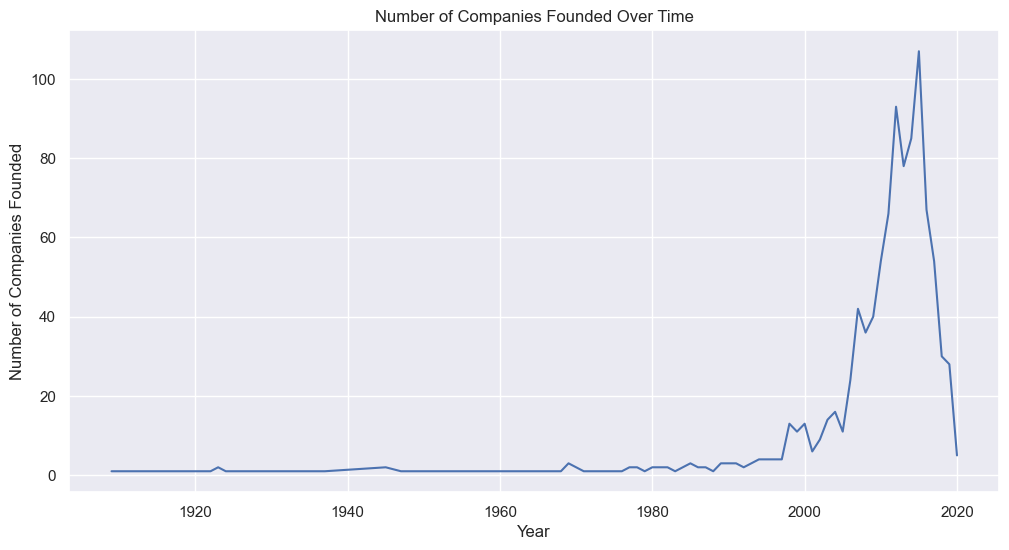

In [325]:
# Number of comapnies founded each year
founded_year_counts = df_company['FOUNDED_YEAR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=founded_year_counts.index, y=founded_year_counts.values)
plt.title('Number of Companies Founded Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Companies Founded')
plt.show()

The line graph above shows a historical view of the number of companies founded each year. Below is an analysis of the observed trends:

- **Early to Mid-20th Century**: The rate of new company formations appears relatively stable. This period does not show significant fluctuations, suggesting a steady environment for business creation without major disruptive events affecting company foundations.

- **Late 1990s Increase**: Starting from the late 1990s, there is a  increase in the number of companies founded. This timeframe corresponds with the dot-com boom, which is a period characterized by the rapid rise of internet-based businesses and a push in tech entrepreneurship.

- **Peak in the 2010s**: The graph shows his peak around the 2010s. Potential factors contributing to this peak include:

- **Recent Years Decline**: The sharp decline following the peak could be indicative of several factors:
   - Incomplete data for the most recent years.
   - Market saturation or the impact of economic downturns.
   - Changes in the global economic landscape, such as increased market entry barriers or industry consolidation.


This graph shows a interesting change development of the amount of companies founded each year.

# How does the average fundraising amount vary across different company size categories?

Therefore the COMPANY worksheet will be merged with the new created dataframe (df_investemnt_per_company) to have the Employee Number and the total Money raised for each company.

In [326]:
df_company_with_investment = pd.merge(df_company, df_investment_per_company, on='COMPANY_NAME', how='left')
df_company_with_investment

,COMPANY_NAME,CATEGORY,LOCATION_x,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,FOUNDED_YEAR,MONEY_RAISED_TOTAL_USD,LOCATION_y,COUNTRY
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,2006.0,9.601915e+08,"San Francisco, California, United States",United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,2014.0,1.850000e+10,"Hangzhou, Zhejiang, China",China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,2016.0,1.017700e+08,"New York, New York, United States",United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,2010.0,6.348800e+09,"Beijing, Beijing, China",China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,2018.0,4.250000e+06,"Brooklyn, New York, United States",United States
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",—,—,$1M to $10M,11-50,2018.0,6.477000e+06,"Bogotá, Distrito Especial, Colombia",Colombia
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",—,—,$50M to $100M,251-500,2009.0,5.552000e+07,"Portland, Oregon, United States",United States
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,2019.0,4.800000e+06,"San Francisco, California, United States",United States
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,1998.0,1.200000e+09,"Charlotte, North Carolina, United States",United States


In [327]:
# Calculating the average money raised for each employee number category
average_money_raised = df_company_with_investment.groupby('EMPLOYEE_NUMBER')['MONEY_RAISED_TOTAL_USD'].mean()

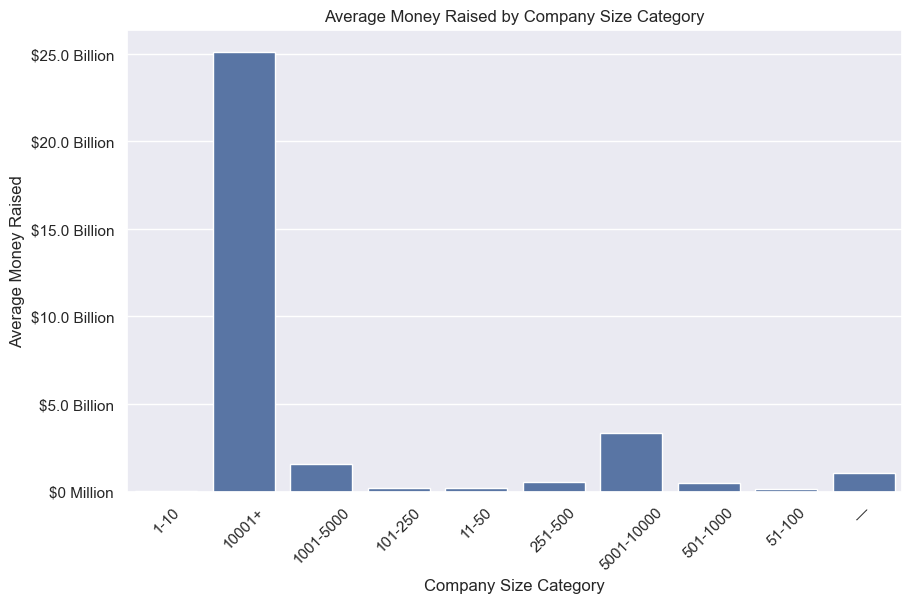

In [328]:
def flexible_formatter(y, pos):
    if y >= 1e9:
        val = '$%1.1f Billion' % (y * 1e-9)
    else:
        val = '$%1.0f Million' % (y * 1e-6)
    return val

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_money_raised.index, y=average_money_raised.values)
plt.xticks(rotation=45)
plt.title('Average Money Raised by Company Size Category')
plt.xlabel('Company Size Category')
plt.ylabel('Average Money Raised')

# Set the x-axis major formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

The plot shows that the bigger companies also seem to raise more money

# Trends in Investment Amounts Over Time

# What is the historical trend of the total investment amount across all companies? (on a yearly basis)

In [329]:
df_investment

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY,MONEY_RAISED_USD
0,Pipe,Venture - Series Unknown,2.500000e+08,"Mar 31, 2021",—,USD,2.500000e+08
1,Pipe,Series A,5.000000e+07,"Mar 9, 2021",Early Stage Venture,USD,5.000000e+07
2,Pipe,Seed,6.000000e+06,"Feb 25, 2020",Seed,USD,6.000000e+06
3,Pipe,Seed,1.000000e+07,"Jun 24, 2020",Seed,USD,1.000000e+07
4,Epic Games,Seed,1.000000e+09,"Apr 13, 2021",Seed,USD,1.000000e+09
...,...,...,...,...,...,...,...
5932,PTC,Post-IPO Equity,1.000000e+09,"Jun 11, 2018",—,USD,1.000000e+09
5933,Berkshire Hathaway,Post-IPO Equity,3.510000e+06,"Aug 15, 2019",—,USD,3.510000e+06
5934,Wipro Technologies,Post-IPO Equity,NaN,"Oct 1, 2006",—,None,NaN
5935,Wipro Technologies,Post-IPO Equity,NaN,"Sep 1, 2007",—,None,NaN


### Creating a Date column

In [330]:
df_investment['ANNOUNCED_DATE'] = pd.to_datetime(df_investment['ANNOUNCED_DATE'], format='%b %d, %Y')

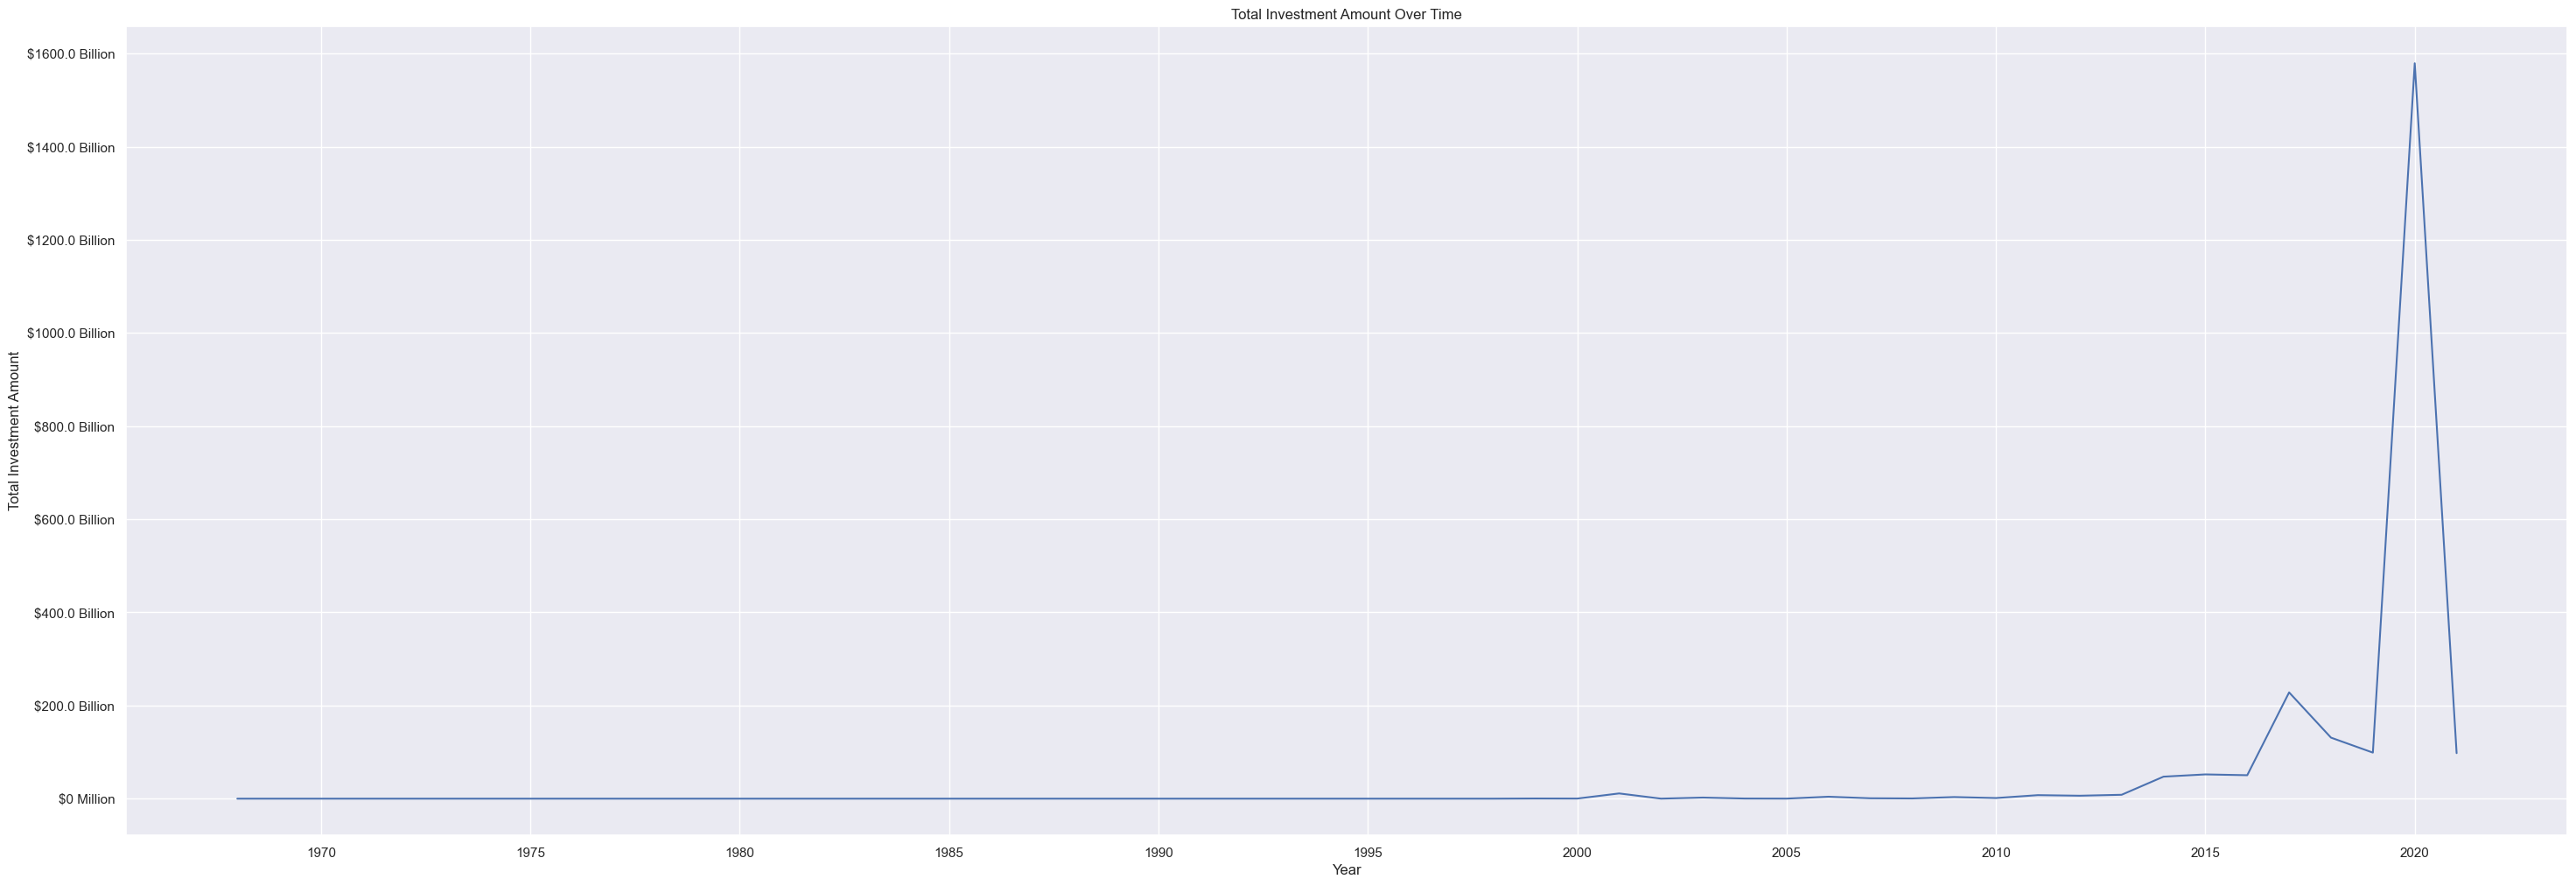

In [331]:
import matplotlib.ticker as ticker

df_investment['YEAR'] = df_investment['ANNOUNCED_DATE'].dt.year
yearly_investment = df_investment.groupby('YEAR')['MONEY_RAISED_USD'].sum()

def flexible_formatter(y, pos):
    if y >= 1e9:
        val = '$%1.1f Billion' % (y * 1e-9)
    else:
        val = '$%1.0f Million' % (y * 1e-6)
    return val

plt.figure(figsize=(36, 12))
sns.lineplot(x=yearly_investment.index, y=yearly_investment.values)

# x-axis major ticks to every 5th year
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Set the x-axis major formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.title('Total Investment Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Investment Amount')
plt.show()


# Surge in Investment Activity Over Time

This line graph reveals the total investment amount over time, highlighting a remarkable surge in recent years. You can observe that for several decades, investment levels remained relatively stable with a gradual increase. However, approaching the present day, there is an exponential rise, culminating in a peak that stands out starkly against the rest of the historical data.

## Key Observations:

- **Historical Consistency**: Initially, the investment landscape was steady, suggesting a period of consistent economic activity without major disruptions.

- **Recent Boom**: The sharp increase aligns with the advent of new technologies and the emergence of startups, especially in the tech sector, which has been known to attract large sums of capital investment.

- **Possible Anomalies**: The peak could indicate either an outlier in the data, such as a few extremely large investments, or it could reflect a year with a high volume of investment activity.

## Implications:

This trend might reflect broader economic shifts, such as the digital revolution, which has led to increased venture capital activity. Additionally, it might indicate a bubble in certain industries, warranting a closer look to ensure sustainable investment practices.

This graph serves as a powerful illustration of the changing dynamics in the investment world, reminding stakeholders to consider both historical context and current market trends when making financial decisions.


# Money Raised in Different Rounds of Investment

## How does the average fundraising amount vary across the different funding Rounds worldwide?

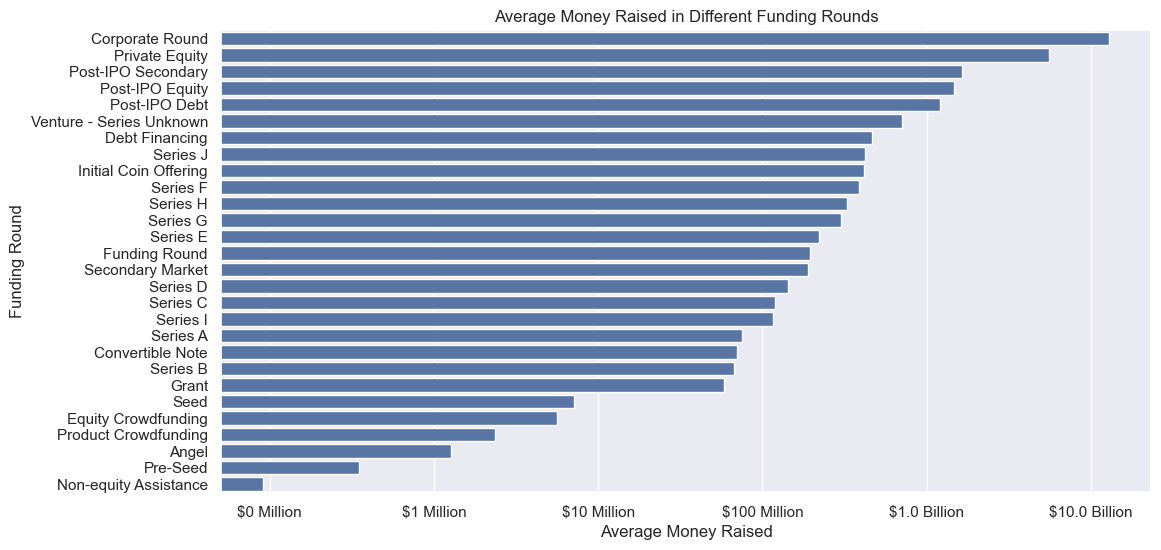

In [332]:
# Grouping by funding round
average_investment_by_round = df_investment.groupby('FUNDING_TYPE')['MONEY_RAISED_USD'].mean()

# Sort the values from high to low
average_investment_by_round_sorted = average_investment_by_round.sort_values(ascending=False)

def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

plt.figure(figsize=(12, 6))
sns.barplot(x=average_investment_by_round_sorted.values, y=average_investment_by_round_sorted.index)
plt.title('Average Money Raised in Different Funding Rounds')
plt.ylabel('Funding Round') 
plt.xlabel('Average Money Raised')
plt.xscale('log')

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

The horizontal bar chart displays the average money raised by companies across a variety of funding rounds. The rounds are notably varied, ranging from early-stage investments like Angel and Seed rounds to more mature funding vehicles such as Series A through I and beyond. Key observations include:

- **Late-Stage Funding Dominance**: Higher average raises are observed in late-stage rounds, such as Corporate Rounds and Private Equity, indicating significant capital injections as companies scale operations or prepare for strategic moves like mergers, acquisitions, or public offerings.
- **Early-Stage Funding**: Early-stage funding sources, including Angel and Seed rounds, show comparatively lower average raises, which is typical due to the inherent risks at this stage and the unproven nature of the ventures.
- **Post-IPO Fundraising**: Post-IPO funding activities, including secondary offerings and equity, also show substantial average raises, reflecting the continued capital needs even after a company has gone public.
- **Diverse Funding Landscape**: The chart reflects a diverse funding landscape, with a mix of traditional equity, debt financing, and more innovative structures like convertible notes, showcasing the variety of instruments companies can utilize to raise funds.

The logarithmic scale on the x-axis underscores the substantial variance in funding amounts, ensuring a clear visualization of both smaller early-stage rounds and the larger sums involved in later stages.

## How does the total fundraising amount vary across the different funding Rounds worldwide?

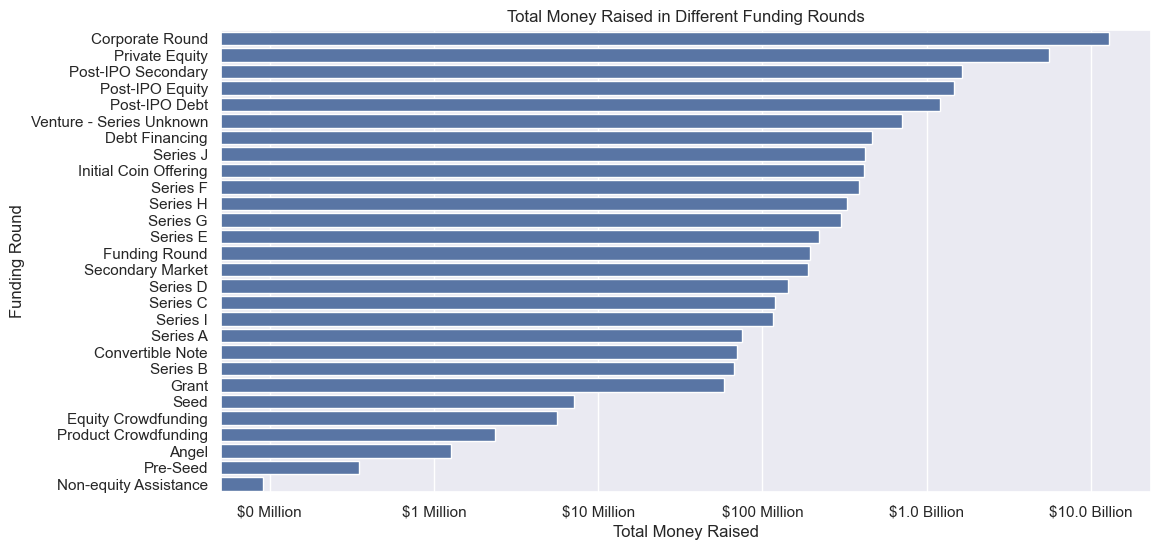

In [333]:
# Grouping by funding round
total_investment_by_round = df_investment.groupby('FUNDING_TYPE')['MONEY_RAISED_USD'].sum()

# Sort the values from high to low
total_investment_by_round_sorted = average_investment_by_round.sort_values(ascending=False)

def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

plt.figure(figsize=(12, 6))
sns.barplot(x=total_investment_by_round_sorted.values, y=total_investment_by_round_sorted.index)
plt.title('Total Money Raised in Different Funding Rounds')
plt.ylabel('Funding Round') 
plt.xlabel('Total Money Raised')
plt.xscale('log')

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

The visualization represents the total funds raised by companies across various funding stages. Notably, rounds typically associated with later-stage financing, such as Corporate Rounds and Private Equity, amass substantial totals, reflecting robust capital infusion for business expansion or strategic developments. Conversely, early-stage investments like Angel and Seed rounds account for relatively smaller aggregate sums, consistent with the foundational nature of these funding stages. This distribution underscores the growth trajectory of businesses as they transition from nascent startups to established entities, with corresponding shifts in their funding sources and scales.

## How does the total fundraising amount vary across the different funding Rounds grouped by the industry?

In [334]:
# Merge the df_investment dataframe with the CATEGORY column from df_company
df_investment = df_investment.merge(df_company[['COMPANY_NAME', 'CATEGORY']], on='COMPANY_NAME', how='left')

In [335]:
df_investment

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY,MONEY_RAISED_USD,YEAR,CATEGORY
0,Pipe,Venture - Series Unknown,2.500000e+08,2021-03-31,—,USD,2.500000e+08,2021,"Finance, Financial Services, Internet, SaaS"
1,Pipe,Series A,5.000000e+07,2021-03-09,Early Stage Venture,USD,5.000000e+07,2021,"Finance, Financial Services, Internet, SaaS"
2,Pipe,Seed,6.000000e+06,2020-02-25,Seed,USD,6.000000e+06,2020,"Finance, Financial Services, Internet, SaaS"
3,Pipe,Seed,1.000000e+07,2020-06-24,Seed,USD,1.000000e+07,2020,"Finance, Financial Services, Internet, SaaS"
4,Epic Games,Seed,1.000000e+09,2021-04-13,Seed,USD,1.000000e+09,2021,"Developer Platform, Gaming, Software, Video Games"
...,...,...,...,...,...,...,...,...,...
4765,PTC,Post-IPO Equity,1.000000e+09,2018-06-11,—,USD,1.000000e+09,2018,"3D Technology, CAD, Enterprise Software, Infor..."
4766,Berkshire Hathaway,Post-IPO Equity,3.510000e+06,2019-08-15,—,USD,3.510000e+06,2019,"Air Transportation, Automotive, Consumer, Cred..."
4767,Wipro Technologies,Post-IPO Equity,NaN,2006-10-01,—,None,NaN,2006,"Cloud Data Services, Consulting, Enterprise So..."
4768,Wipro Technologies,Post-IPO Equity,NaN,2007-09-01,—,None,NaN,2007,"Cloud Data Services, Consulting, Enterprise So..."


In [336]:
industry_investment = df_investment.groupby(['CATEGORY', 'FUNDING_TYPE'])['MONEY_RAISED_USD'].sum().reset_index()

## **To filter by industry and get the information for the industry you are interested in, please rerun the following cell.**

In [337]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create the dropdown menu for industry selection
industry_dropdown = widgets.Dropdown(
    options=industry_investment['CATEGORY'].unique(),
    description='Industry:',
    disabled=False,
)

# Plotting functions
def flexible_formatter(y, pos):
    if y >= 1e9: 
        val = '$%1.1f Billion' % (y * 1e-9)
    else: 
        val = '$%1.0f Million' % (y * 1e-6)
    return val

def plot_funding_by_industry(industry):
    # Filter the data for the selected industry
    industry_data = industry_investment[industry_investment['CATEGORY'] == industry]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=industry_data, x='FUNDING_TYPE', y='MONEY_RAISED_USD')
    plt.title(f'Total Money Raised in Each Stage for {industry}')
    plt.xlabel('Funding Round')
    plt.ylabel('Total Money Raised')
    plt.xticks(rotation=45)
    
    # Set the x-axis major formatter
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

    plt.show()

# Event handler for dropdown menu
def on_industry_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        plot_funding_by_industry(change['new'])

# Bind the event handler to the dropdown menu
industry_dropdown.observe(on_industry_change, names='value')

# Display the dropdown
display(industry_dropdown)


Dropdown(description='Industry:', options=('3D Printing, 3D Technology, Precious Metals, Robotics', '3D Techno…

# How does the age of a company relate to its acquisition activity?

In [338]:
df_acquisition_counts = pd.DataFrame({
                                    'COUNT': df_acquisition['COMPANY_NAME'].value_counts()})
df_company = df_company.merge(df_acquisition_counts, on='COMPANY_NAME', how='left')

In [339]:
df_company

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,FOUNDED_YEAR,COUNT
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,2006.0,50.0
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,2014.0,4.0
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,2016.0,NaN
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,2010.0,NaN
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,2018.0,NaN
...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",—,—,$1M to $10M,11-50,2018.0,NaN
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",—,—,$50M to $100M,251-500,2009.0,5.0
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,2019.0,NaN
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,1998.0,7.0


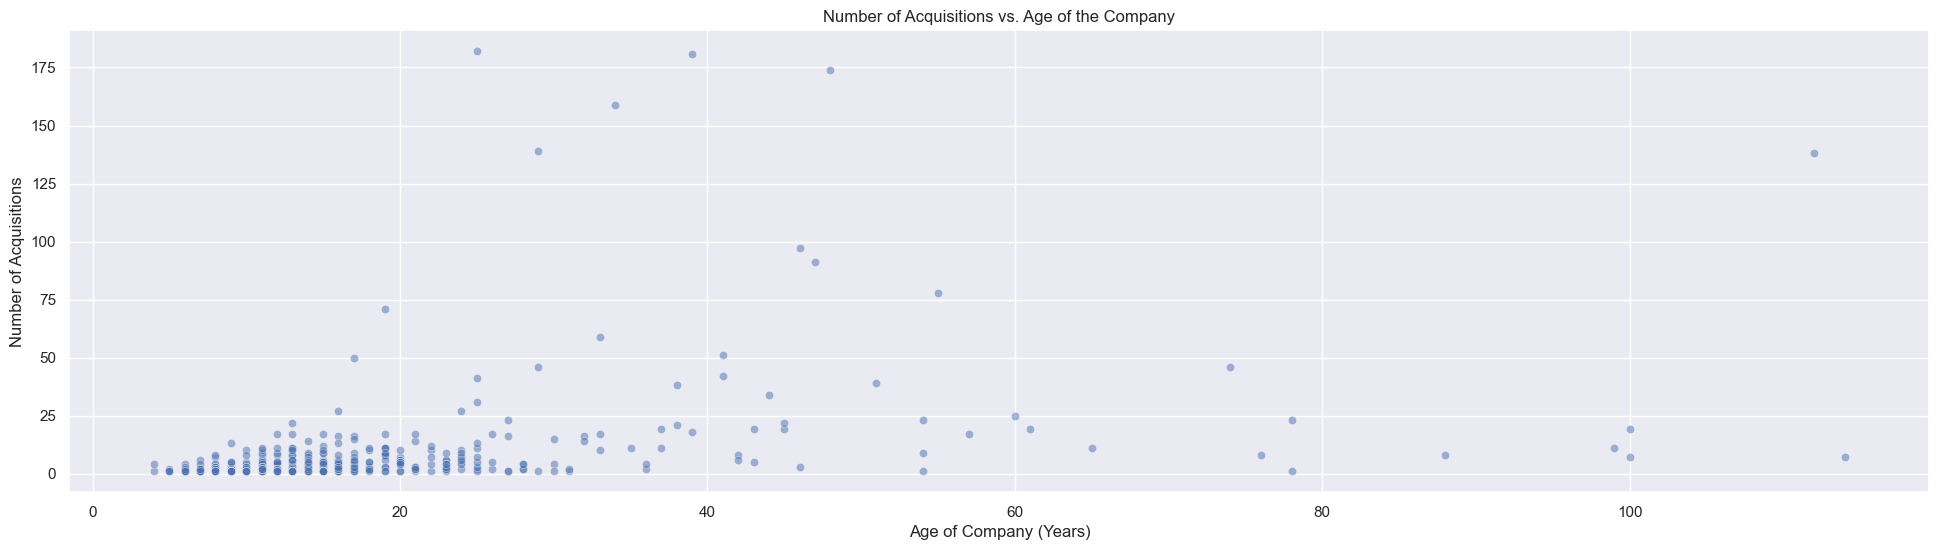

In [342]:
# Calculation age of the company
current_date = 2023
df_company['AGE'] = (2023 - df_company['FOUNDED_YEAR'])

# Scatter plot
plt.figure(figsize=(24, 6))
sns.scatterplot(data=df_company, x='AGE', y='COUNT', alpha = 0.5)
plt.title('Number of Acquisitions vs. Age of the Company')
plt.xlabel('Age of Company (Years)')
plt.ylabel('Number of Acquisitions')
plt.show()

This scatter plot depicts the relationship between company age and the number of acquisitions. There is a visible trend where older companies have a higher number of acquisitions, which can be attributed to the likelihood of established companies having more resources and strategic needs to pursue acquisitions. However, there are also younger companies with a significant number of acquisitions, suggesting aggressive growth strategies or consolidation trends in certain industries. The plot indicates a diverse acquisition behavior across companies of different ages.

In [343]:
df_company

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,FOUNDED_YEAR,COUNT,AGE
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,2006.0,50.0,17.0
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,2014.0,4.0,9.0
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,2016.0,NaN,7.0
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,2010.0,NaN,13.0
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,2018.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",—,—,$1M to $10M,11-50,2018.0,NaN,5.0
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",—,—,$50M to $100M,251-500,2009.0,5.0,14.0
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,2019.0,NaN,4.0
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,1998.0,7.0,25.0


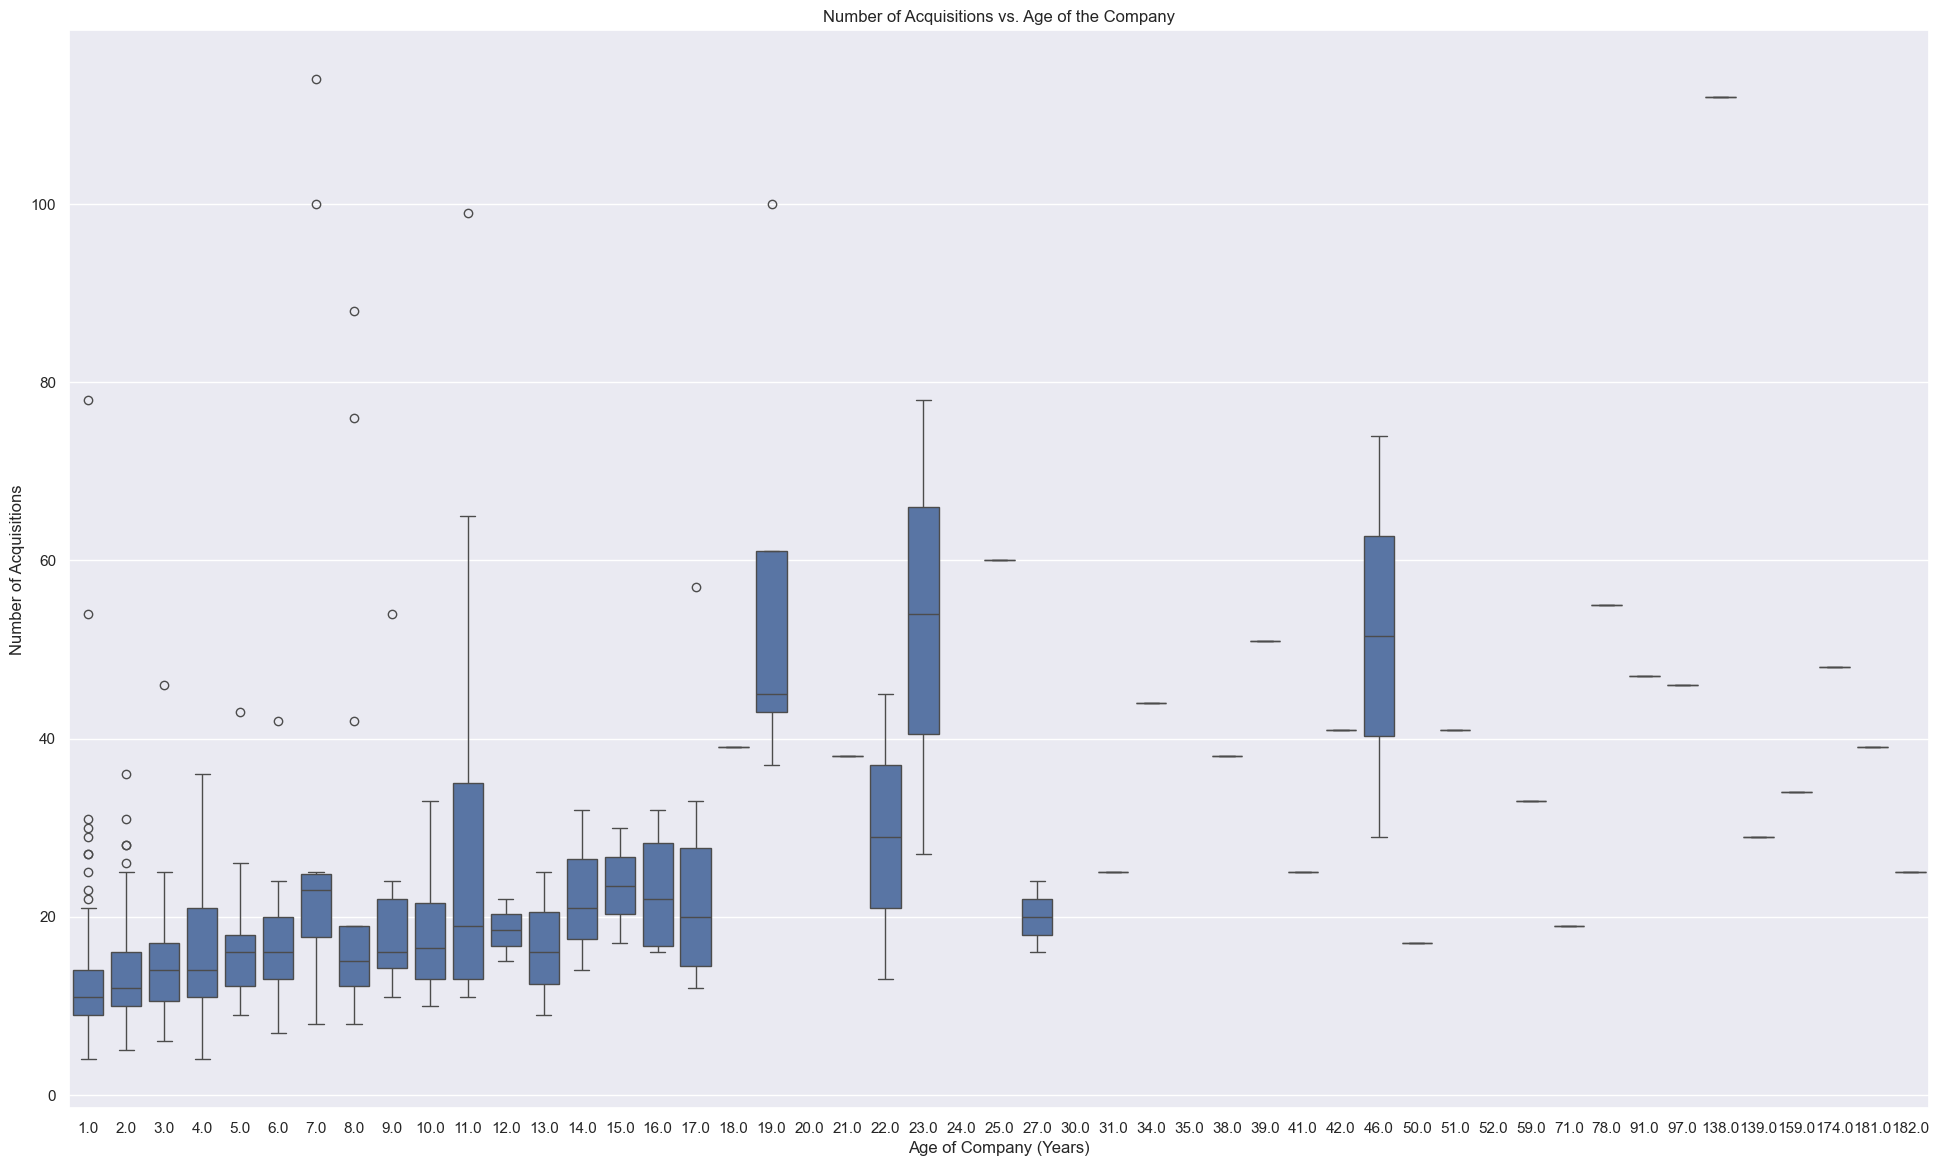

In [344]:
# boxplot
plt.figure(figsize=(24, 14))
sns.boxplot(data=df_company, x='COUNT', y='AGE')
plt.title('Number of Acquisitions vs. Age of the Company')
plt.xlabel('Age of Company (Years)')
plt.ylabel('Number of Acquisitions')
plt.show()

The boxplot showcases the distribution of acquisitions made by companies across different ages. The median number of acquisitions tends to increase with company age, indicating a growth in acquisition activity as companies mature. The presence of outliers suggests that there are exceptional companies with a significantly higher number of acquisitions than their peers. Notably, the variability in acquisitions also seems to increase with age, implying a divergence in acquisition strategies as companies grow older. This may reflect the different paths companies take as they evolve, with some pursuing aggressive expansion and others taking a more conservative approach.

# How has the annual number of acquisitions and total expenditure on acquisitions by companies evolved over time?

In [345]:
df_acquisition['PRICE'] = df_acquisition['PRICE'].replace({'\$': '', ',': '', '—': ''}, regex=True)

# Convert the 'PRICE' column to floats
df_acquisition['PRICE'] = pd.to_numeric(df_acquisition['PRICE'], errors='coerce')

In [346]:
df_acquisition['ANNOUNCED_DATE'] = pd.to_datetime(df_acquisition['ANNOUNCED_DATE'], errors='coerce')

In [347]:
acquisitions_per_year = df_acquisition.groupby(df_acquisition["ANNOUNCED_DATE"].dt.year).size()

In [348]:
acquisitions_amount_per_year = df_acquisition.groupby(df_acquisition["ANNOUNCED_DATE"].dt.year)['PRICE'].sum()

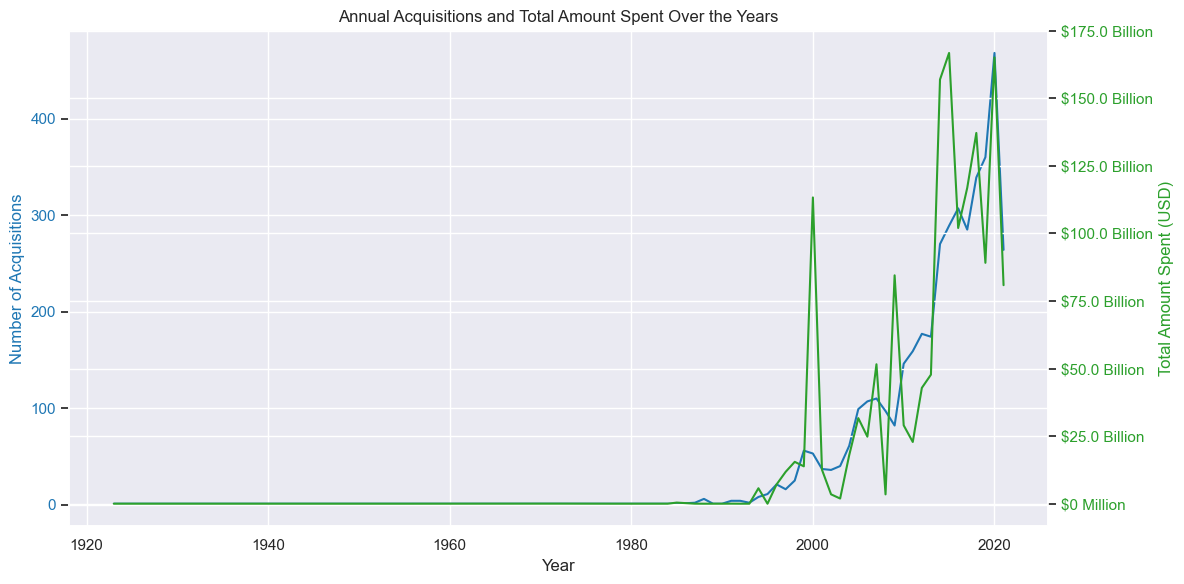

In [349]:
import matplotlib.pyplot as plt

# Create figure 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the count of acquisitions on the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Acquisitions', color='tab:blue')
ax1.plot(acquisitions_per_year.index, acquisitions_per_year.values, color='tab:blue', label='Number of Acquisitions')
ax1.tick_params(axis='y', labelcolor='tab:blue')

def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

ax2 = ax1.twinx()  
ax2.set_ylabel('Total Amount Spent (USD)', color='tab:green')  
ax2.plot(acquisitions_amount_per_year.index, acquisitions_amount_per_year.values, color='tab:green', label='Total Amount Spent')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

# Title and layout
plt.title('Annual Acquisitions and Total Amount Spent Over the Years')
fig.tight_layout()
plt.show()



The line chart depicts two trends over time: the number of acquisitions and the total amount spent on these acquisitions. There's a clear increase in both the number of acquisitions and the amount spent from around the 1980s onwards, with a notable surge in recent years. This uptick may reflect the acceleration of industry consolidation, the growth of corporate size, and the increased competitiveness in global markets. The fluctuations in the amount spent, particularly the sharp peaks, could correspond to specific years where mega-acquisitions occurred. The general trend suggests that companies are not only acquiring more frequently but also spending significantly more on each acquisition, possibly due to the increasing value of targeted companies and the strategic importance of these acquisitions.

In [350]:
df_acquisition

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,CURRENCY
0,IBM,Turbonomic,2021-04-29,2.000000e+09,Acquisition,USD
1,IBM,myInvenio,2021-04-15,NaN,Acquisition,None
2,IBM,Taos Mountain,2021-01-14,NaN,Acquisition,None
3,IBM,Cloudant,2014-02-24,NaN,Acquisition,None
4,IBM,TruQua,2020-11-16,NaN,Acquisition,None
...,...,...,...,...,...,...
5284,Opendoor,Open Listings,2018-09-11,NaN,—,None
5285,Inscripta,Solana Biosciences,2018-09-05,NaN,Acquisition,None
5286,Glossier,Dynamo,2018-02-28,NaN,Acquisition,None
5287,FreightWaves,StakUp,2019-06-03,NaN,Acquisition,None


# Which countries have the highest average acquisition costs paid by their companies?

In [352]:
# Merge the df_investment dataframe with the CATEGORY column from df_company
df_acquisition = df_acquisition.merge(df_company[['COMPANY_NAME','LOCATION', 'CATEGORY']], on='COMPANY_NAME', how='left')

In [353]:
df_acquisition['COUNTRY'] = df_acquisition['LOCATION'].str.split(',').str[-1].str.strip()

In [354]:
# Calculate the average money raised per country
df_average_acquisition_by_country = pd.DataFrame(df_acquisition.groupby('COUNTRY')['PRICE'].mean().sort_values(ascending=False))

In [355]:
df_average_acquisition_by_country

,PRICE
COUNTRY,
Japan,4.572143e+09
United Kingdom,3.173914e+09
Switzerland,2.283830e+09
Sweden,1.878109e+09
Finland,1.785073e+09
Germany,1.580628e+09
France,1.560736e+09
United States,1.553640e+09
Russian Federation,1.453562e+09


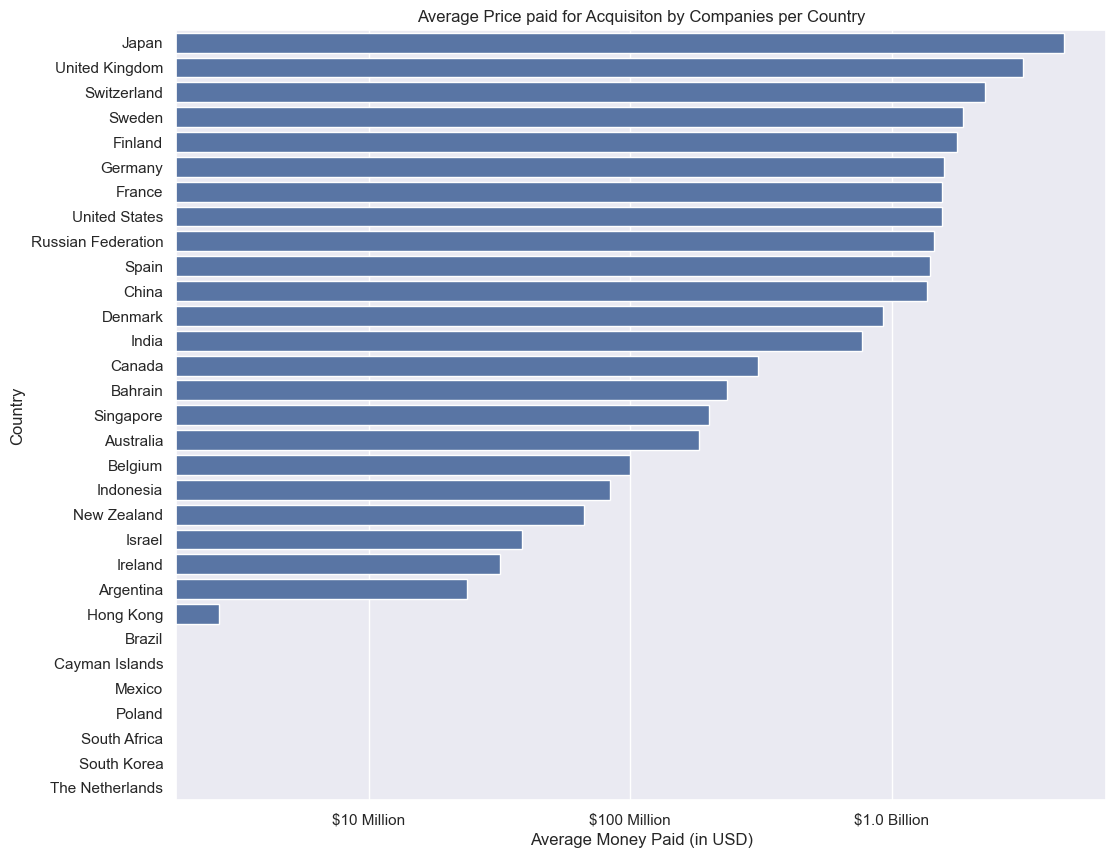

In [356]:
def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

# Visualization using a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(data = df_average_acquisition_by_country, x='PRICE', y=df_average_acquisition_by_country.index)
plt.title('Average Price paid for Acquisiton by Companies per Country')
plt.xlabel('Average Money Paid (in USD)')
plt.ylabel('Country')
plt.xscale('log')
sns.set()

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

### Average Acquisition Costs by Country

The bar chart provides a clear view of the average acquisition costs paid by companies across different countries. It appears that Japan leads with the highest average cost, indicating a trend of significant investment by Japan based companies in mergers and acquisitions. This is closely followed by United-Kingdom, Switzerland and China, which also show substantial average costs, suggesting a competitive market for company acquisitions.

Notably, the United States, often perceived as a hub of large-scale acquisitions, is positioned slightly lower on the list, which may reflect a larger number of acquisitions with a diverse range of values. Countries like Germany, France, and Japan also feature prominently, underscoring their active participation in the global M&A landscape.

Towards the lower end of the scale, we see countries like South Korea, the Netherlands, and others, where the average acquisition cost is relatively modest in comparison. This disparity could be due to various factors including market size, the number of high-value companies, and the economic strategies prevalent in these countries.

Overall, the data presented in this chart offers valuable insights into the financial dynamics at play within the acquisition strategies of companies from different nations.

# Which countries have the highest total acquisition costs paid by their companies?

In [357]:
#Replace non-numeric characters and '—' with NaN
df_acquisition['PRICE'] = df_acquisition['PRICE'].replace({'\$': '', ',': '', '—': ''}, regex=True)

# Convert the 'PRICE' column to floats, now that '—' has been replaced with an empty string
df_acquisition['PRICE'] = pd.to_numeric(df_acquisition['PRICE'], errors='coerce')

# Calculate the average money raised per country
df_total_acquisition_by_country = pd.DataFrame(df_acquisition.groupby('COUNTRY')['PRICE'].sum().sort_values(ascending=False))

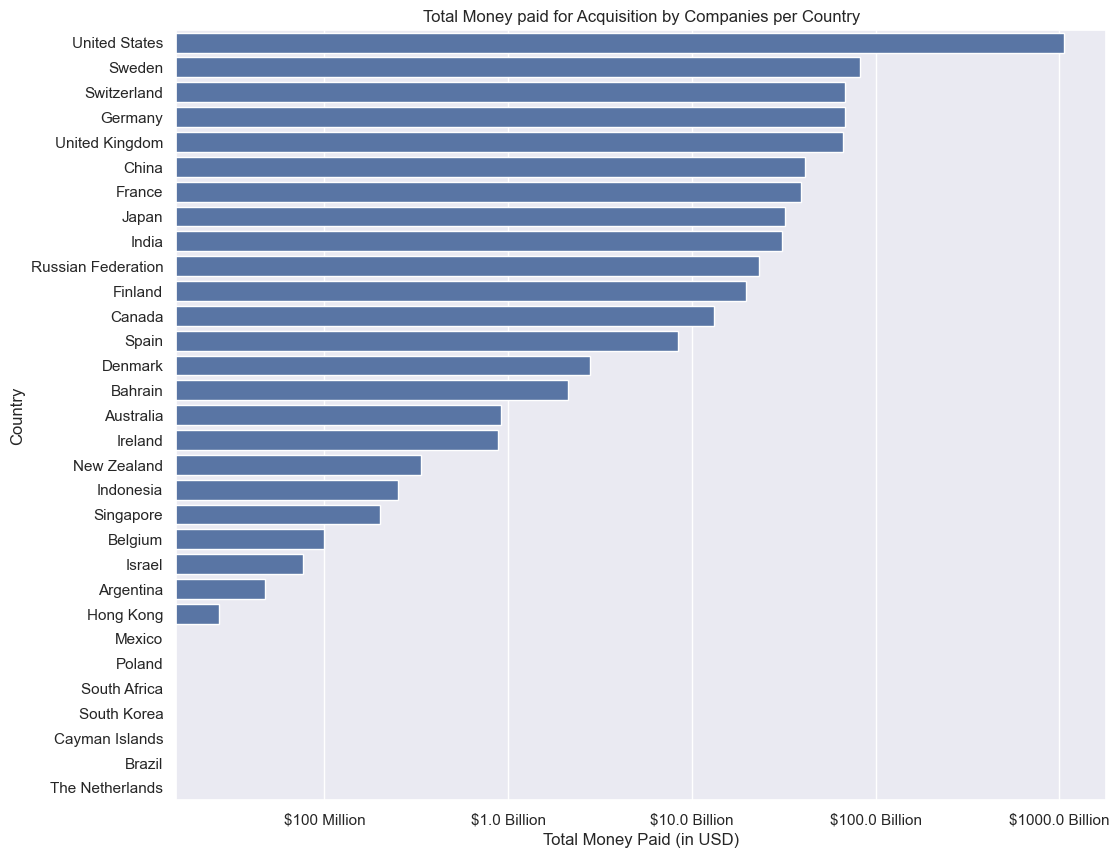

In [358]:
def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

# Visualization using a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(data = df_total_acquisition_by_country, x='PRICE', y=df_total_acquisition_by_country.index)
plt.title('Total Money paid for Acquisition by Companies per Country')
plt.xlabel('Total Money Paid (in USD)')
plt.ylabel('Country')
plt.xscale('log')
sns.set()

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

### Acquisition Costs by Country

The chart presents the total amount spent on acquisitions by companies in various countries. The United States leads, showing that American companies are the most active in buying other businesses. Companies in Switzerland and Germany also spend a lot on acquisitions, indicating they use this strategy to grow their businesses.

The United Kingdom and China follow closely, which tells us that companies in these countries are also making significant investments in acquisitions.

On the lower end, countries like Brazil, Belgium, and The Netherlands have lower total acquisition costs, suggesting that companies there might be buying fewer companies or making smaller deals.

Overall, the chart shows how much companies in each country are spending to expand through acquisitions.

# Which industries have the highest average acquisition costs as paid by companies?

In [359]:
df_average_acquisition_by_industry = pd.DataFrame(df_acquisition.groupby('CATEGORY')['PRICE'].mean().sort_values(ascending=False))
df_average_acquisition_by_industry = df_average_acquisition_by_industry.head(10)

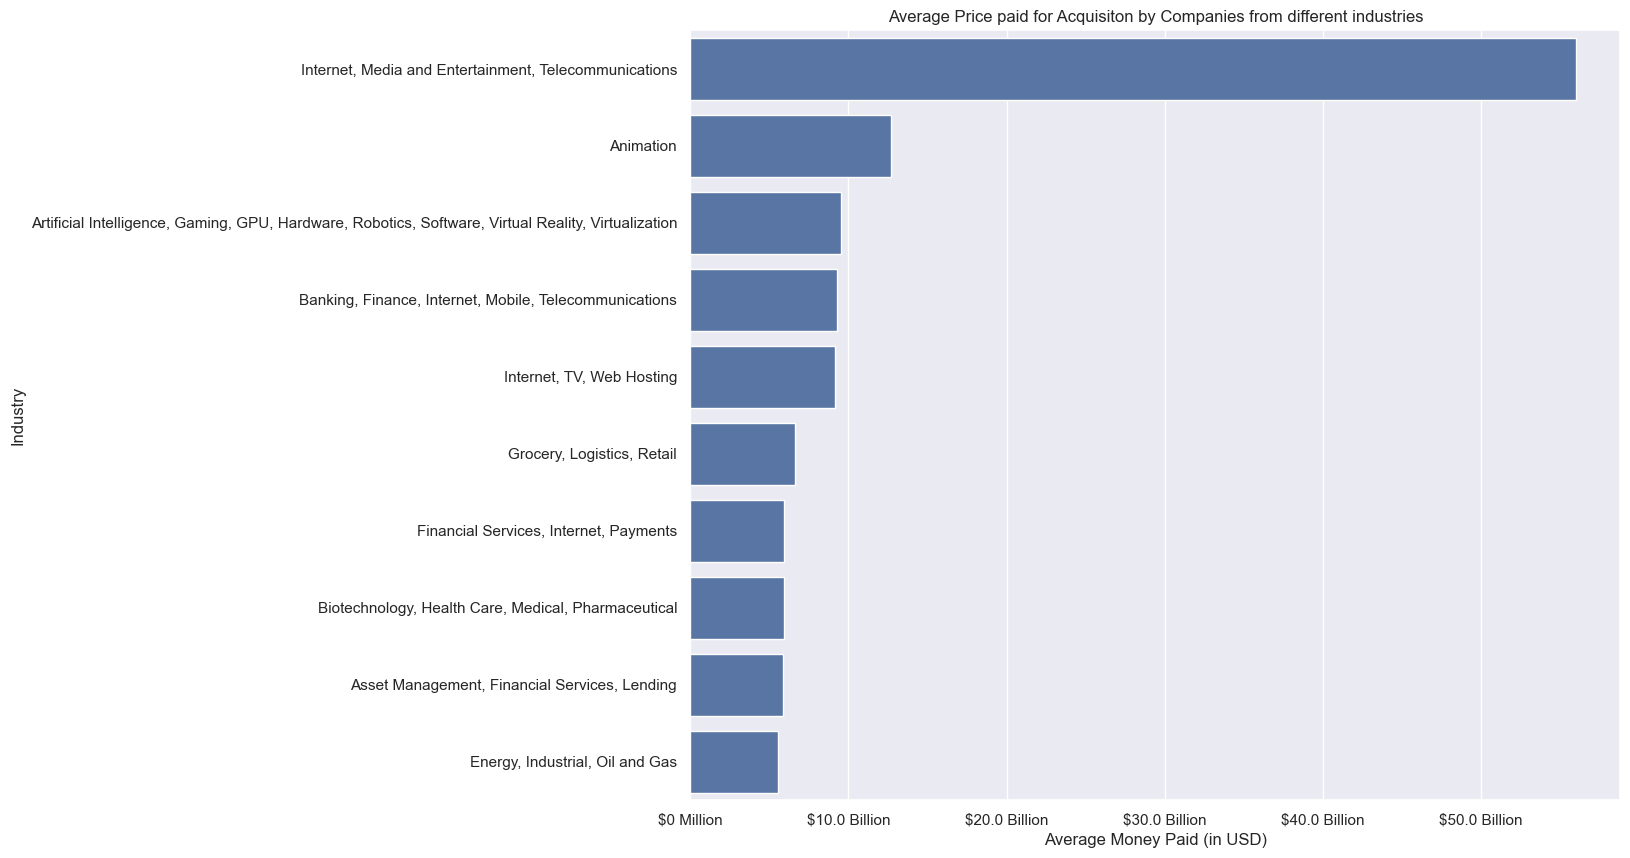

In [360]:
def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

# Visualization using a bar chart
plt.figure(figsize=(12, 10)) 
sns.barplot(data = df_average_acquisition_by_industry, x='PRICE', y=df_average_acquisition_by_industry.index, orient='h')
plt.title('Average Price paid for Acquisiton by Companies from different industries')
plt.xlabel('Average Money Paid (in USD)')
plt.ylabel('Industry')
sns.set()

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

### Industry-Wise Acquisition Costs Analysis

The bar chart provides insights into the average acquisition costs incurred by companies across different industries. The Internet, Media and Entertainment, and Telecommunications sectors show the highest average acquisition costs, indicating these industries are highly competitive and possibly consolidating.

Animation, AI, Bankind and Finance and Internet-related services like TV and Web Hosting also report significant expenditure on acquisitions, suggesting a trend towards the expansion and diversification within digital content and service delivery platforms.

On the other hand, industries like Grocery, Logistics, Retail, and Biotechnology, Health Care, Medical, and Pharmaceutical exhibit lower acquisition costs on average, which might reflect less consolidation activity or smaller scale deals within these sectors.

The data reveals a clear distinction between technology-driven industries, which are pursuing acquisitions, and more traditional sectors where acquisition activity is less pronounced.


# Which industries have the total acquisition costs as paid by companies?

In [361]:
df_total_acquisition_by_industry = pd.DataFrame(df_acquisition.groupby('CATEGORY')['PRICE'].sum().sort_values(ascending=False))
df_total_acquisition_by_industry = df_total_acquisition_by_industry.head(10)

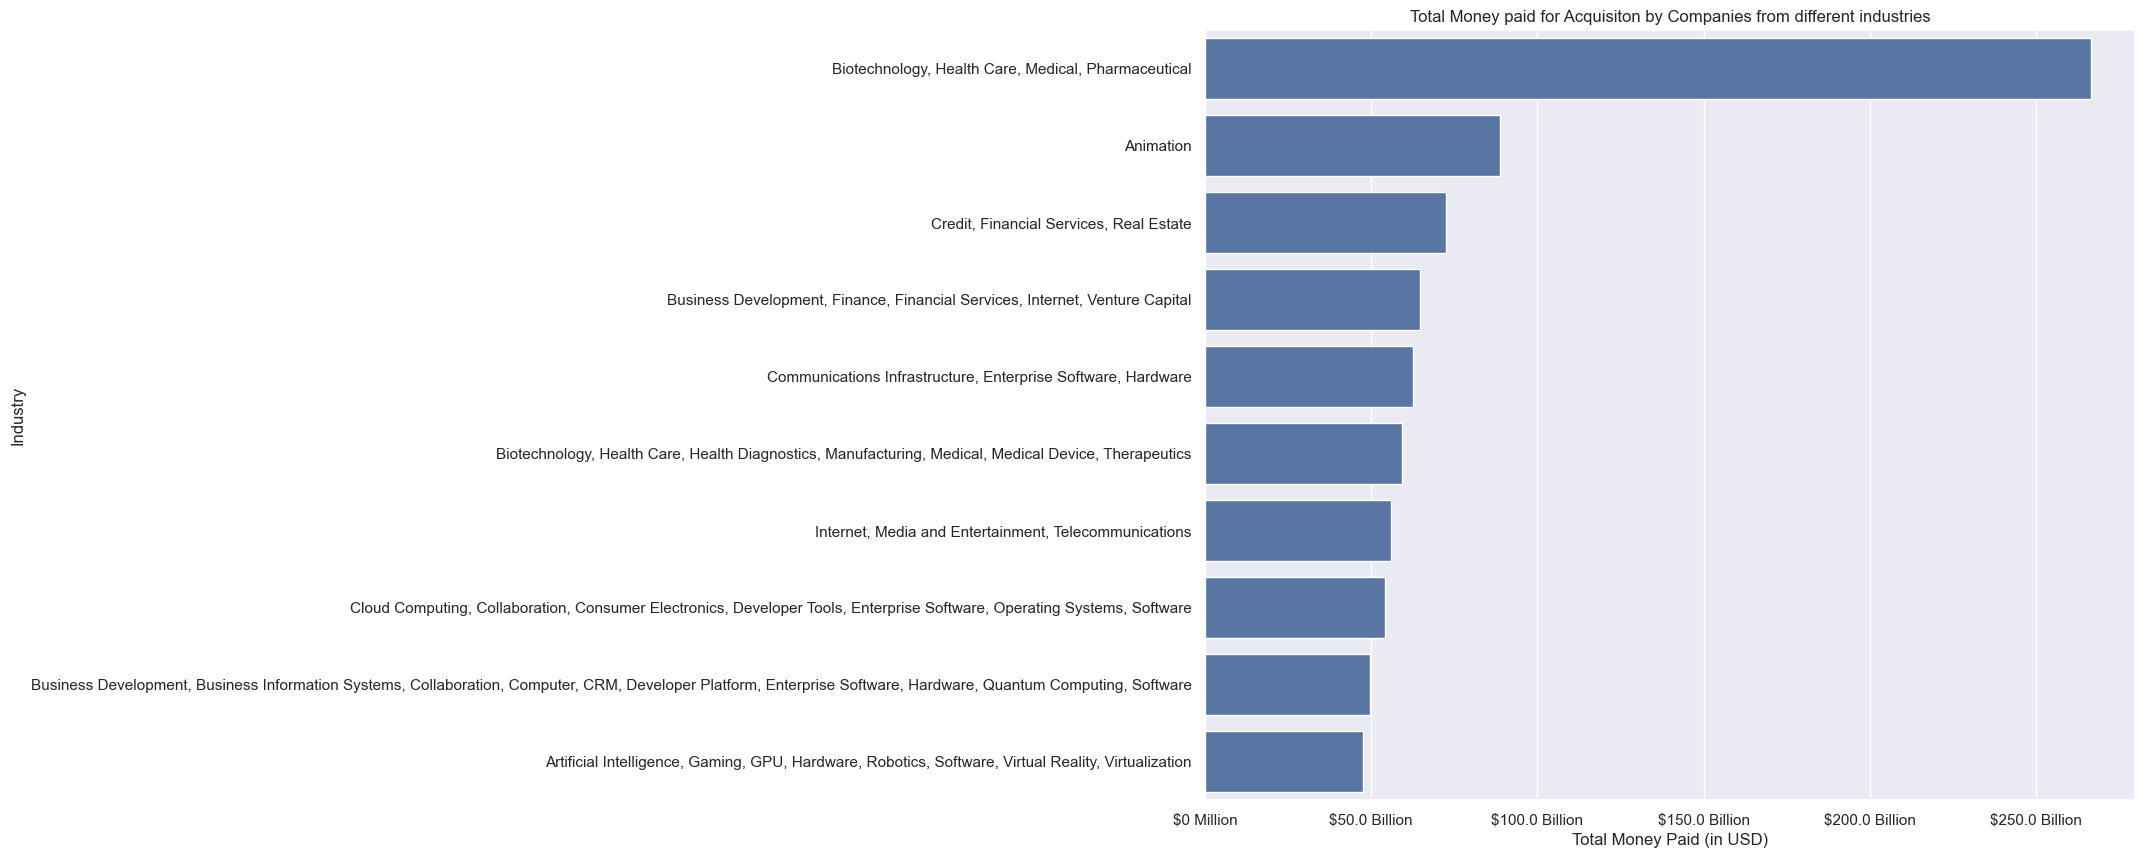

In [362]:
def flexible_formatter(x, pos):
    if x >= 1e9: 
        val = '$%1.1f Billion' % (x * 1e-9)
    else: 
        val = '$%1.0f Million' % (x * 1e-6)
    return val

# Visualization using a bar chart
plt.figure(figsize=(12, 10)) 
sns.barplot(data = df_total_acquisition_by_industry, x='PRICE', y=df_total_acquisition_by_industry.index, orient='h')
plt.title('Total Money paid for Acquisiton by Companies from different industries')
plt.xlabel('Total Money Paid (in USD)')
plt.ylabel('Industry')
sns.set()

# Set the x-axis major formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(flexible_formatter))

plt.show()

### Analysis of Total Money Paid for Acquisitions by Industry

The chart illustrates the total sum paid for acquisitions by companies from various industries, with a notable dominance in sectors heavily influenced by technology and innovation. The Biotechnology, Health Care, Medical, and Pharmaceutical industries exhibit the highest total expenditures, reflecting the high value and competitive nature of mergers and acquisitions within these fields.

Animation, a sector traditionally seen as creative and content-driven, surprisingly ranks high in total acquisition costs, possibly indicating a consolidation trend or investment in new technologies like CGI and streaming platforms.

Industries such as Cloud Computing, Artificial Intelligence, and Enterprise Software also show significant investment in acquisitions, underscoring the strategic importance of expanding technological capabilities and market share in these rapidly evolving sectors.

This visualization captures the investment behaviors of companies in high-growth potential areas, signifying a trend towards building robust, vertically integrated entities capable of dominating their respective markets.

# Which company has spent the most for acquisitions?

In [363]:
company_most_money_spended = df_acquisition.groupby('COMPANY_NAME')['PRICE'].sum().sort_values(ascending=False)
company_most_money_spended

COMPANY_NAME
Pfizer                     2.052550e+11
The Walt Disney Company    8.887000e+10
Apollo                     7.259720e+10
EQT                        6.466300e+10
Cisco                      6.253440e+10
                               ...     
Guild Education            0.000000e+00
Grove Collaborative        0.000000e+00
Grofers                    0.000000e+00
Goldbelly                  0.000000e+00
project44                  0.000000e+00
Name: PRICE, Length: 497, dtype: float64

# Which company has done the most acqusitions?

In [364]:
company_most_acquisitons = df_acquisition.groupby('COMPANY_NAME').size().sort_values(ascending=False)
company_most_acquisitons

COMPANY_NAME
Google        182
Cisco         181
Microsoft     174
Accenture     159
EQT           139
             ... 
PhonePe         1
Exclaimer       1
Exabeam         1
EclecticIQ      1
Druva           1
Length: 497, dtype: int64

In [365]:
google_money_spend_on_acquisition = df_acquisition[df_acquisition['COMPANY_NAME'] == 'Google']["PRICE"].sum()
google_money_spend_on_acquisition

25639500000.0

# Employee analysis

## Where did the CEO's of these companies have studied?

In [366]:
len(df_employee['JOB_TITLES'].unique())

12308

In [367]:
# Lowercase JOB_TITLES column
df_employee['JOB_TITLES'] = df_employee['JOB_TITLES'].str.lower()

def map_to_ceo(title):
    if pd.isna(title):
        return title
    if 'chief executive officer' in title or 'ceo' in title:
        return 'CEO'
    return title

df_employee['JOB_TITLES'] = df_employee['JOB_TITLES'].apply(map_to_ceo)


In [368]:
# Apply mapping function
df_employee['JOB_TITLES'] = df_employee['JOB_TITLES'].apply(map_to_ceo)

unique_titles_after = len(df_employee['JOB_TITLES'].unique())
print(unique_titles_after)


11964


### In the following feel free to change the number of Universities you want to have a look on. The default number is set to 20. But feel free to change this!

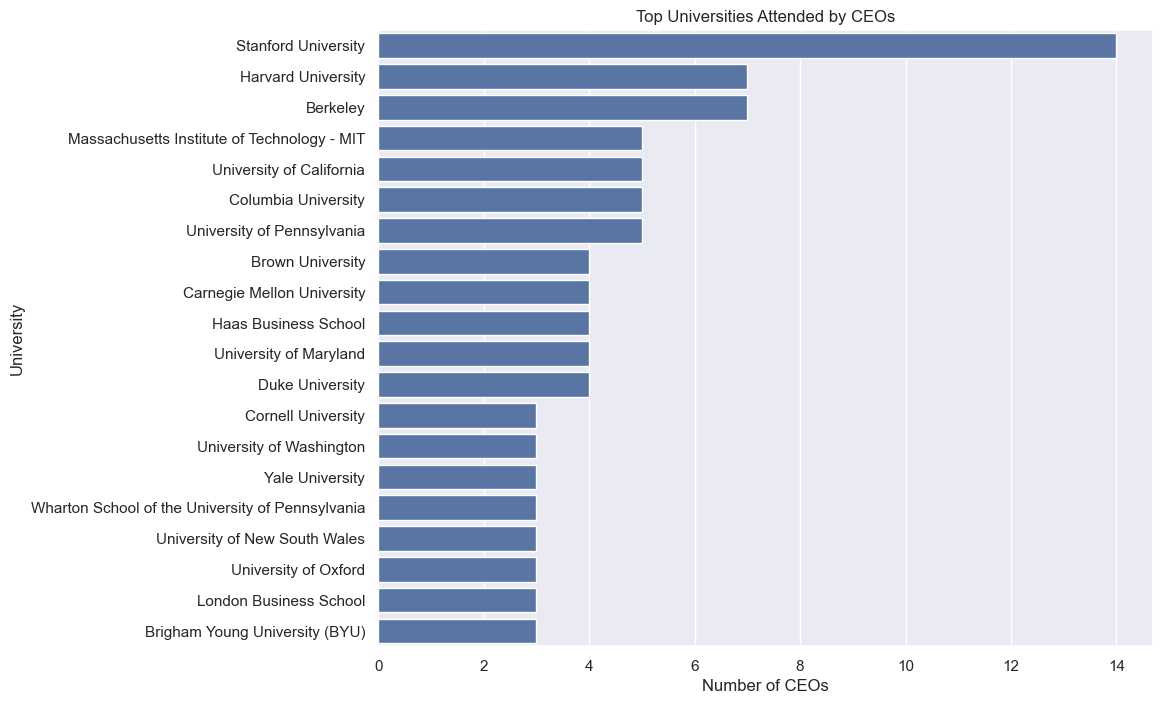

In [369]:
ceos = df_employee[df_employee['JOB_TITLES'].str.contains("CEO", case=False, na=False)]

# Extracting universities
ceo_universities = ceos['ATTENDED_SCHOOLS'].dropna().str.split(',').explode().str.strip()
university_counts = ceo_universities.value_counts()

# Plotting the top 20 universities
top_n = 20 
plt.figure(figsize=(10, 8))
sns.barplot(x=university_counts.head(top_n), y=university_counts.head(top_n).index)
plt.title('Top Universities Attended by CEOs')
plt.xlabel('Number of CEOs')
plt.ylabel('University')
plt.show()


The bar chart outlines the educational backgrounds of CEOs, highlighting the number that have attended prominent universities. Stanford University leads, followed closely by Harvard University and UC Berkeley, suggesting these institutions are notable for nurturing individuals who go on to become CEOs. MIT and the University of California also rank highly, indicating a strong correlation between these prestigious academic environments and the likelihood of reaching top executive positions.

The presence of Ivy League and other elite institutions like the Wharton School of the University of Pennsylvania and Yale University underlines the importance of high-caliber education in the path to corporate leadership. Additionally, international institutions such as the University of Oxford and London Business School are represented, emphasizing the global nature of executive education among CEOs.

This data can provide insights into the pipeline of leadership talent and the potential influence of university networks and education quality on career trajectories in the corporate world.

In [370]:
ceo_universities

107      Indian Institute of Technology Kharagpur Stanf...
491      Princeton University Stanford Graduate School ...
1704                         Rhode Island School of Design
1879                                       Duke University
2056     Columbia University University of Nebraska-Lin...
                               ...                        
20451                                    Temple University
20556                                         IDC Herzliya
20559    King Mongkut's Institute of Technology Ladkrabang
20560                              University of Greenwich
20621                                      Rice University
Name: ATTENDED_SCHOOLS, Length: 425, dtype: object

In [371]:
# Count the number of CEOs from each university
uni_ceo_count = ceos['ATTENDED_SCHOOLS'].dropna().str.split(',').explode().str.strip().value_counts()

# Get the top 20 universities
top_20_unis = uni_ceo_count.head(20).index

<Figure size 1000x1500 with 0 Axes>

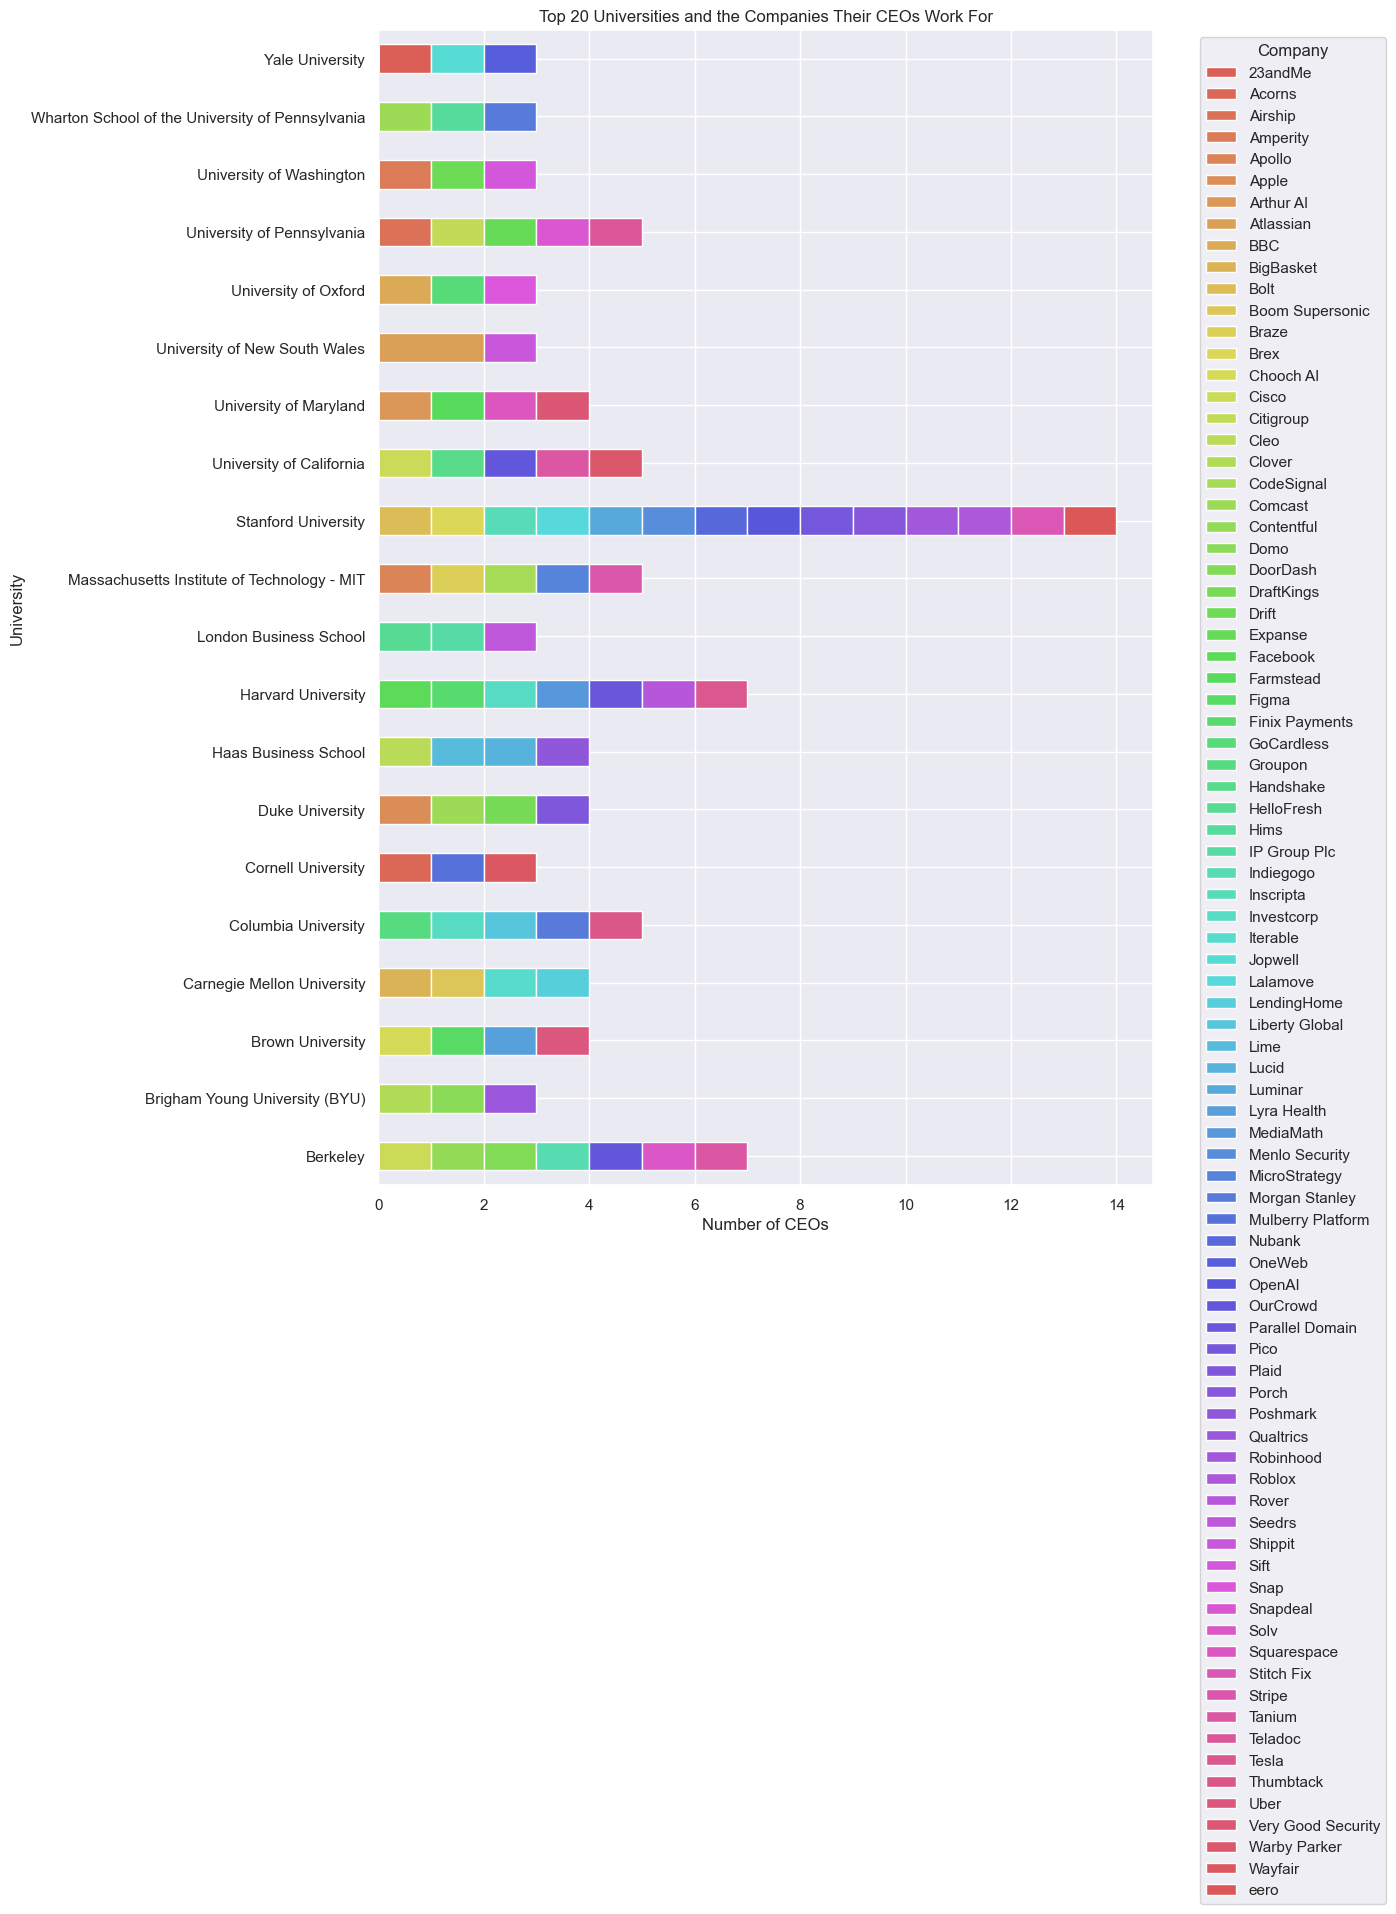

In [372]:
# Filtering for CEOs and dropping rows with missing university or company information
ceos = df_employee[df_employee['JOB_TITLES'].str.contains("CEO", case=False, na=False)]
ceos = ceos.dropna(subset=['ATTENDED_SCHOOLS', 'COMPANY_NAME'])

# Splitting the universities and repeating the company name for each university
ceo_uni_company = ceos.set_index('COMPANY_NAME')['ATTENDED_SCHOOLS'].str.split(',').explode().str.strip().reset_index()

# Counting the number of CEOs from each university
uni_ceo_count = ceo_uni_company['ATTENDED_SCHOOLS'].value_counts()

# Get the top 20 universities
top_20_unis = uni_ceo_count.head(20).index

# Filter the CEO data to include only those from the top 20 universities
top_ceo_uni_company = ceo_uni_company[ceo_uni_company['ATTENDED_SCHOOLS'].isin(top_20_unis)]

# Aggregating data for the top 20 universities
top_ceo_counts = top_ceo_uni_company.groupby(['ATTENDED_SCHOOLS', 'COMPANY_NAME']).size().unstack(fill_value=0)

palette = sns.color_palette("hls", len(top_ceo_counts.columns))

# Plotting the data as a horizontal bar chart with color palette
plt.figure(figsize=(10, 15))
top_ceo_counts.plot(kind='barh', stacked=True, figsize=(10, 15), color=palette)
plt.title('Top 20 Universities and the Companies Their CEOs Work For')
plt.ylabel('University')
plt.xlabel('Number of CEOs')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Top 20 Universities and the Companies Their CEOs Work For

The horizontal bar chart above presents an overview of the educational backgrounds of CEOs across various high-profile companies. The barchart shows:

- **Stanford University** and **Harvard University** are leading institutions, with a notable number of CEOs having graduated from these universities, reflecting their prestige and the efficacy of their alumni networks.
- The diversity of colors within each bar indicates that these CEOs are spread across a multitude of companies, suggesting a broad influence of these educational institutions across different sectors.
- The chart also suggests a potential correlation between the universities' curricula and the industries their graduates tend to lead in.

This data can be instrumental for prospective students and educators alike, offering insights into which universities have a strong track record of nurturing industry leaders.

## In which Companies did the Students from the different univerities become CEO?

The following "dashboard" allows to explore the academic backgrounds of CEOs and the companies they lead. By selecting a university from the dropdown menu, the dashboard will display a bar chart showing the number of CEOs who graduated from that university, along with the companies they are currently leading.

This simple tool is designed to provide clear insights into the educational paths that lead to leadership positions in the business world. It emphasizes the universities that have produced the highest number of CEOs and reveals the industries where these individuals have made their impact.

Please use the dropdown menu to select a university and view the corresponding data. To get insight for another university just rerun the following cell!

In [373]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns


# dropdown menu for university selection
university_dropdown = widgets.Dropdown(
    options=ceo_uni_company['ATTENDED_SCHOOLS'].unique(),  # This should be a list of all universities
    description='University:',
    disabled=False,
)

# Plotting function
def plot_companies_by_university(university):
    # Filter for the selected university
    uni_data = ceo_uni_company[ceo_uni_company['ATTENDED_SCHOOLS'] == university]

    # Create the plot
    plt.figure(figsize=(12, 6))
    # Get the count of CEOs for each company for the selected university
    company_ceo_count = uni_data.groupby('COMPANY_NAME').size().reset_index(name='CEO_COUNT')
    sns.barplot(x='CEO_COUNT', y='COMPANY_NAME', data=company_ceo_count)
    plt.title(f'Companies and Their CEOs from {university}')
    plt.xlabel('Number of CEOs')
    plt.ylabel('Company')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

# Event handler for dropdown menu
def on_university_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        plot_companies_by_university(change['new'])

# Binding event handler to the dropdown menu
university_dropdown.observe(on_university_change, names='value')

# Display the dropdown
display(university_dropdown)

Dropdown(description='University:', options=('Indian Institute of Technology Kharagpur Stanford University Wha…

# Dashboard for Company Analysis

### The Dashboard shows the following information:

**Company Information**
- Industry
- Location
- Founding Date
- Exited On:
- Closing Date 
- Revenue Range
- Employee Number
- Founded Year
- Total Money Raised
- Country
- Attended Schools of the CEO's
- Number of Fundings
- Number of Acquisitions
- Total Money Spent on Acquisitions

**Aqusition Timeline** <br>
Here the different Aquisiton of the Company is shown. It shows the amount of money spended on which company over the whole period. 

**Investment Timeline** <br>
Here the timeline of all the different fundings a company has got is shown in a graph.

### Creating Dataset (df_dashboard)

In [374]:
# creating a dataframe which shows the total amount of money spent on acquistion 
df_acquisition_per_company = df_acquisition.groupby('COMPANY_NAME')['PRICE'].agg('sum').reset_index()
df_acquisition_per_company.columns = ['COMPANY_NAME', 'TOTAL_MONEY_SPENT_ON_ACQUSITION']

In [376]:
df_dashboard = df_company_with_investment
# Filtering to get only CEOs from df_employee
ceos = df_employee[df_employee['JOB_TITLES'].str.contains('CEO', case=False, na=False)]

# Merging this with the df_dashboard DataFrame
df_dashboard = df_dashboard.merge(ceos[['COMPANY_NAME', 'ATTENDED_SCHOOLS']], on='COMPANY_NAME', how='left')
df_dashboard.drop(columns = ['LOCATION_y'], inplace=True)
df_dashboard.rename(columns={"LOCATION_x": "LOCATION"}, inplace=True)

number_of_fundings = df_investment['COMPANY_NAME'].value_counts()
df_dashboard['NUMBER_OF_FUNDINGS'] = df_dashboard['COMPANY_NAME'].map(number_of_fundings)

# Convert the 'COUNT' Series to a DataFrame and rename the column
df_acquisition_counts.rename(columns={'COUNT':'NUMBER_OF_ACQUISITIONS'}, inplace=True)

# Merge the modified DataFrame with df_dashboard
df_dashboard = df_dashboard.merge(df_acquisition_counts['NUMBER_OF_ACQUISITIONS'], on='COMPANY_NAME', how='left')


df_dashboard['TOTAL_MONEY_SPENT_ON_ACQUISITIONS'] = df_acquisition.groupby('COMPANY_NAME')['PRICE'].agg('sum')

df_dashboard['COMPANY_NAME'] = df_dashboard['COMPANY_NAME'].str.lower()
df_investment['COMPANY_NAME'] = df_investment['COMPANY_NAME'].str.lower()
df_acquisition['COMPANY_NAME'] = df_acquisition['COMPANY_NAME'].str.lower()



In [377]:
df_dashboard

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,FOUNDED_YEAR,MONEY_RAISED_TOTAL_USD,COUNTRY,ATTENDED_SCHOOLS,NUMBER_OF_FUNDINGS,NUMBER_OF_ACQUISITIONS,TOTAL_MONEY_SPENT_ON_ACQUISITIONS
0,twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,2006.0,9.601915e+08,United States,NaN,13.0,50.0,NaN
1,ant group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,2014.0,1.850000e+10,China,China Europe International Business School Zh...,2.0,4.0,NaN
2,squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,2016.0,1.017700e+08,United States,NaN,7.0,NaN,NaN
3,xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,2010.0,6.348800e+09,China,NaN,11.0,NaN,NaN
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,2018.0,4.250000e+06,United States,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,2019.0,4.800000e+06,United States,NaN,4.0,NaN,NaN
1155,jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,2019.0,4.800000e+06,United States,NaN,4.0,NaN,NaN
1156,bank of america,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,1998.0,1.200000e+09,United States,NaN,3.0,7.0,NaN
1157,bank of america,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,1998.0,1.200000e+09,United States,NaN,3.0,7.0,NaN


## Extracting Data for the Timelines

### Investment Timeline Data Extraction

In [378]:
def get_investment_data_for_company(company_name):
    # Filter for the specific company
    company_investments = df_investment[df_investment['COMPANY_NAME'] == company_name]

    # Convert the date column to datetime
    company_investments.loc[:, 'ANNOUNCED_DATE'] = pd.to_datetime(company_investments['ANNOUNCED_DATE'], errors='coerce')

    return company_investments

# Get investment data for a specific company
specific_company_investments = get_investment_data_for_company("Your Company Name")

### Acquisition Timeline Data Extraction

In [379]:
def get_acquisition_data_for_company(company_name):
    # Filter for the specific company
    company_acquisitions = df_acquisition[df_acquisition['COMPANY_NAME'] == company_name]

    # Convert the date column to datetime
    company_acquisitions['ANNOUNCED_DATE'] = pd.to_datetime(company_acquisitions['ANNOUNCED_DATE'], errors='coerce')

    return company_acquisitions

# Get acquisition data for a specific company
specific_company_acquisitions = get_acquisition_data_for_company("Your Company Name")

In [380]:
df_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   COMPANY_NAME                       1159 non-null   object 
 1   CATEGORY                           1159 non-null   object 
 2   LOCATION                           1159 non-null   object 
 3   FOUNDED_ON                         1159 non-null   object 
 4   EXITED_ON                          1159 non-null   object 
 5   CLOSED_ON                          1159 non-null   object 
 6   REVENU_RANGE                       1159 non-null   object 
 7   EMPLOYEE_NUMBER                    1159 non-null   object 
 8   FOUNDED_YEAR                       1126 non-null   float64
 9   MONEY_RAISED_TOTAL_USD             1052 non-null   float64
 10  COUNTRY                            1052 non-null   object 
 11  ATTENDED_SCHOOLS                   396 non-null    objec

# Creating dashboard

In [381]:
import folium
from geopy.geocoders import Nominatim
from IPython.display import display

# Function to display Company information
def display_company_overview_on_map(company_name):
    if company_name in df_dashboard['COMPANY_NAME'].values:
        company_data = df_dashboard[df_dashboard['COMPANY_NAME'] == company_name].iloc[0]

        # Displaying all the data columns
        print(f"Company Name: {company_data['COMPANY_NAME']}")
        print(f"Category: {company_data['CATEGORY']}")
        print(f"Location: {company_data['LOCATION']}")
        print(f"Founded On: {company_data['FOUNDED_ON']}")
        print(f"Exited On: {company_data['EXITED_ON']}")
        print(f"Closed On: {company_data['CLOSED_ON']}")
        print(f"Revenue Range: {company_data['REVENU_RANGE']}")
        print(f"Employee Number: {company_data['EMPLOYEE_NUMBER']}")
        print(f"Founded Year: {company_data['FOUNDED_YEAR']}")
        print(f"Total Money Raised: ${company_data['MONEY_RAISED_TOTAL_USD']:,.2f}")
        print(f"Country: {company_data['COUNTRY']}")
        print(f"Attended Schools: {company_data['ATTENDED_SCHOOLS']}")
        print(f"Number of Fundings: {company_data['NUMBER_OF_FUNDINGS']}")
        print(f"Number of Acquisitions: {company_data['NUMBER_OF_ACQUISITIONS']}")
        print(f"Total Money Spent on Acquisitions: {company_data['TOTAL_MONEY_SPENT_ON_ACQUISITIONS']}")
    else:
        print("Company not found.")
        
    if company_name in df_dashboard['COMPANY_NAME'].values:
        company_data = df_dashboard[df_dashboard['COMPANY_NAME'] == company_name].iloc[0]

        # Gecoding to get Geo data 
        geolocator = Nominatim(user_agent="geoapiExercises")
        location = geolocator.geocode(company_data['LOCATION'])
        
        # Checking for coordinates
        if location:
            # Creating map
            company_map = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)
            
            # Pop up for Company information
            popup_text = (
                f"<strong>Company Name:</strong> {company_data['COMPANY_NAME']}<br>"
                f"<strong>Category:</strong> {company_data['CATEGORY']}<br>"
                f"<strong>Location:</strong> {company_data['LOCATION']}<br>"
                f"<strong>Founded On:</strong> {company_data['FOUNDED_ON']}<br>"
                f"<strong>Exited On:</strong> {company_data['EXITED_ON']}<br>"
                f"<strong>Closed On:</strong> {company_data['CLOSED_ON']}<br>"
                f"<strong>Revenue Range:</strong> {company_data['REVENU_RANGE']}<br>"
                f"<strong>Employee Number:</strong> {company_data['EMPLOYEE_NUMBER']}<br>"
                f"<strong>Founded Year:</strong> {company_data['FOUNDED_YEAR']}<br>"
                f"<strong>Total Money Raised:</strong> ${company_data['MONEY_RAISED_TOTAL_USD']:,.2f}<br>"
                f"<strong>Country:</strong> {company_data['COUNTRY']}<br>"
                f"<strong>Attended Schools:</strong> {company_data['ATTENDED_SCHOOLS']}<br>"
                f"<strong>Number of Fundings:</strong> {company_data['NUMBER_OF_FUNDINGS']}<br>"
                f"<strong>Number of Acquisitions:</strong> {company_data['NUMBER_OF_ACQUISITIONS']}<br>"
                f"<strong>Total Money Spent on Acquisitions:</strong> {company_data['TOTAL_MONEY_SPENT_ON_ACQUISITIONS']}"
            )
            
            # adding marker with popup
            folium.Marker(
                [location.latitude, location.longitude],
                popup=folium.Popup(popup_text, max_width=300)  # Hier legen wir die maximale Breite des Popups fest
            ).add_to(company_map)
            
            # display map
            display(company_map)
        else:
            print(f"Location for {company_name} not found.")
    else:
        print("Company not found.")

### Plot Investment Timeline

In [382]:
def plot_investment_timeline(company_name):
    # Filter for the specific company's investment data
    company_investments = df_investment[df_investment['COMPANY_NAME'] == company_name].copy()
    company_investments['ANNOUNCED_DATE'] = pd.to_datetime(company_investments['ANNOUNCED_DATE'], errors='coerce')
    
    # Sorting data by date to ensure the line connects points chronologically
    company_investments = company_investments.sort_values('ANNOUNCED_DATE')

    # Check if there are investments to plot
    if not company_investments.empty:
        plt.figure(figsize=(10, 6))
        
        # Plotting both scatter points and a line connecting them
        plt.scatter(company_investments['ANNOUNCED_DATE'], company_investments['MONEY_RAISED_USD'])
        plt.plot(company_investments['ANNOUNCED_DATE'], company_investments['MONEY_RAISED_USD'], linestyle='-', marker='', color='blue')
        
        plt.title(f'Investment Timeline for {company_name}')
        plt.xlabel('Date')
        plt.ylabel('Investment Amount')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No investment data available for {company_name}.")

### Plot acquisiton timeline

In [383]:
import plotly.express as px

def plot_acquisition_timeline_interactive(company_name):
    # Filter for the specific company's acquisition data
    company_acquisitions = df_acquisition[df_acquisition['COMPANY_NAME'] == company_name]
    company_acquisitions['ANNOUNCED_DATE'] = pd.to_datetime(company_acquisitions['ANNOUNCED_DATE'], errors='coerce')

    # Sorting data by date to ensure the chronological order
    company_acquisitions = company_acquisitions.sort_values('ANNOUNCED_DATE')

    # Check if there are acquisitions to plot
    if not company_acquisitions.empty:
        # Create an interactive scatter plot
        fig = px.scatter(company_acquisitions, x='ANNOUNCED_DATE', y='ACQUIREE_NAME', 
                         hover_data=['ACQUIREE_NAME', 'PRICE'], title=f'Acquisition Timeline for {company_name}')
        
        # Update layout for better readability
        fig.update_layout(yaxis={'categoryorder':'total ascending'}, xaxis_tickangle=-45, height=800)
        fig.update_traces(marker=dict(size=5))
        
        fig.show()
    else:
        print(f"No acquisition data available for {company_name}.")

## Dashboard
### Just enter a company name into the input field, you are interested in!

In [384]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [385]:
import warnings
warnings.filterwarnings('ignore')

# Text input widget for company name
text_input = widgets.Text(
    placeholder='Type the company name',
    description='Company Name:'
)

# Button to trigger the display of data
button = widgets.Button(description="Show Data")

# Output widget to display the results
output = widgets.Output()

# Callback function for the button
def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        company_name = text_input.value.lower()
        if company_name:
            # Call your functions to display data
            display_company_overview_on_map(company_name)
            plot_investment_timeline(company_name)
            plot_acquisition_timeline_interactive(company_name)
        else:
            print("Please enter a company name.")

button.on_click(on_button_clicked)

# Display the widgets
display(text_input, button, output)


Text(value='', description='Company Name:', placeholder='Type the company name')

Button(description='Show Data', style=ButtonStyle())

Output()